In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training1\numpy\resampled_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax

array([[1.9137644154466282, 'd13c_site1b_07_025.tif'],
       [1.3546828796736816, 'd13c_site1b_09_028.tif'],
       [2.5178205264005986, 'd13c_site1b_14_053.tif'],
       [1.344436561822875, 'd13c_site1b_17_025.tif'],
       [1.6078498876571843, 'd13c_site1b_18_046.tif'],
       [1.2741230394609675, 'd13c_site1b_18_048.tif'],
       [1.3814174952401728, 'd13c_site1b_18_051.tif'],
       [1.7931200221557553, 'd13c_site1b_19_030.tif'],
       [1.5437238589103532, 'd13c_site1b_19_063.tif'],
       [1.5199209618023377, 'd13c_site1b_21_018.tif'],
       [1.8280471281766617, 'd13c_site1b_21_034.tif'],
       [2.4531580008419005, 'd13c_site1b_21_052.tif'],
       [1.5049779501679776, 'd13c_site1b_22_035.tif'],
       [2.349925413115604, 'd13c_site1b_22_037.tif'],
       [2.319533969904729, 'd13c_site1b_22_038.tif'],
       [2.003977259481263, 'd13c_site1b_22_053.tif'],
       [2.345388143290319, 'd13c_site1b_22_054.tif'],
       [2.317161725627411, 'd13c_site1b_22_055.tif'],
       [1.482128

In [3]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training1\numpy\origin_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('d13c_')[1]
    site_name.append(site)

tiff_dir = r'E:\wenqu\aviris\single_pixel_clip_tif\combine'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

site1b_07_025.tif


AttributeError: 'NoneType' object has no attribute 'RasterCount'

In [4]:
df_spectral = df
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_07_025.tif,0.032935,0.018852,0.015076,0.017154,0.019138,0.022016,0.024114,0.024167,0.027301,...,0.023570,0.020351,0.025002,0.027706,0.023824,0.027307,0.051793,0.145811,0.075221,0.041778
1,site1b_09_028.tif,0.006645,0.011930,0.014607,0.014739,0.018153,0.019467,0.021518,0.022907,0.024639,...,0.030415,0.030288,0.032028,0.036514,0.045322,0.043860,0.122543,0.279037,0.081118,0.068412
2,site1b_14_053.tif,0.017193,0.014306,0.012029,0.013225,0.018224,0.016499,0.022416,0.022292,0.025883,...,0.045158,0.037550,0.041932,0.048280,0.037048,0.049565,0.187288,0.197523,0.152697,0.091556
3,site1b_17_025.tif,-0.000027,0.007030,0.013618,0.008660,0.014693,0.013955,0.017993,0.019603,0.020197,...,0.037642,0.032151,0.037952,0.043279,0.039149,0.057971,0.154784,0.285082,0.119805,0.073000
4,site1b_18_046.tif,0.009434,0.007173,0.008611,0.004670,0.011469,0.017490,0.016812,0.019641,0.019750,...,0.041660,0.038605,0.040594,0.044314,0.039912,0.074845,0.076731,0.360529,0.089029,0.092035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,site6_55_009.tif,0.036976,0.030732,0.027157,0.027013,0.028782,0.029882,0.030916,0.035789,0.036144,...,0.077743,0.075721,0.069707,0.078426,0.067656,0.076694,0.257025,0.334686,0.198551,0.078130
316,site6_55_010.tif,0.017687,0.029311,0.024823,0.025234,0.027849,0.029225,0.030655,0.033508,0.035585,...,0.073891,0.072373,0.068211,0.080692,0.073772,0.087726,0.238959,0.244229,0.108440,0.073833
317,site6_56_008.tif,0.024493,0.032721,0.024011,0.023344,0.028793,0.028631,0.029709,0.033150,0.036126,...,0.073257,0.067961,0.063227,0.068943,0.080177,0.085050,0.200354,0.275683,0.233892,0.099366
318,site6_56_009.tif,0.027422,0.029281,0.031863,0.022390,0.025971,0.030068,0.032959,0.034209,0.036921,...,0.072728,0.069023,0.066231,0.073100,0.070084,0.083366,0.230209,0.336358,0.214847,0.130138


In [5]:
print(df_spectral['filename'])

0      site1b_07_025.tif
1      site1b_09_028.tif
2      site1b_14_053.tif
3      site1b_17_025.tif
4      site1b_18_046.tif
             ...        
315     site6_55_009.tif
316     site6_55_010.tif
317     site6_56_008.tif
318     site6_56_009.tif
319     site6_56_010.tif
Name: filename, Length: 320, dtype: object


In [6]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [7]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [8]:
band_name = np.array(band_name)

In [9]:
# vertically stack two section of arrays to create a new array
site1b_x = x_spectra[0:80, :]
site2a_x = x_spectra[80:160, :]
site2c_x = x_spectra[160:240,:]
site6_x1 = x_spectra[240:320,:]

x = np.vstack((site1b_x, site2a_x,site2c_x,site6_x1))
# site2c_x = x[]
x.shape

(320, 319)

In [10]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training1\numpy\resampled_std_d13c.npy',  allow_pickle=True)
y1 = np.array(d13c_trait_pdf_ymax)

In [11]:
len(y1[:, 1])

320

In [12]:
print(y1[:, 1])

['d13c_site1b_07_025.tif' 'd13c_site1b_09_028.tif'
 'd13c_site1b_14_053.tif' 'd13c_site1b_17_025.tif'
 'd13c_site1b_18_046.tif' 'd13c_site1b_18_048.tif'
 'd13c_site1b_18_051.tif' 'd13c_site1b_19_030.tif'
 'd13c_site1b_19_063.tif' 'd13c_site1b_21_018.tif'
 'd13c_site1b_21_034.tif' 'd13c_site1b_21_052.tif'
 'd13c_site1b_22_035.tif' 'd13c_site1b_22_037.tif'
 'd13c_site1b_22_038.tif' 'd13c_site1b_22_053.tif'
 'd13c_site1b_22_054.tif' 'd13c_site1b_22_055.tif'
 'd13c_site1b_23_021.tif' 'd13c_site1b_23_038.tif'
 'd13c_site1b_23_039.tif' 'd13c_site1b_25_028.tif'
 'd13c_site1b_25_044.tif' 'd13c_site1b_26_044.tif'
 'd13c_site1b_26_061.tif' 'd13c_site1b_29_035.tif'
 'd13c_site1b_30_021.tif' 'd13c_site1b_30_037.tif'
 'd13c_site1b_30_084.tif' 'd13c_site1b_32_039.tif'
 'd13c_site1b_32_087.tif' 'd13c_site1b_33_026.tif'
 'd13c_site1b_34_029.tif' 'd13c_site1b_34_043.tif'
 'd13c_site1b_34_087.tif' 'd13c_site1b_35_045.tif'
 'd13c_site1b_35_046.tif' 'd13c_site1b_36_093.tif'
 'd13c_site1b_37_049.tif' 'd13c

In [13]:
labels1 = [] 
for i in range(len(y1[:, 1])):
    substrings = y1[:, 1][i]
    site_name = substrings.split("_")[1]
    labels1.append(site_name)

In [14]:
labels1

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site2a',
 'site2a',
 'site2a',
 'site2a',
 'site2a',
 'site2a',
 'site2a',
 'site2a',
 'site2a',
 'site2a',
 'site2a',

In [15]:
site1b_labels1 = labels1[0:80]
site2a_labels1 = labels1[80:160]
site2c_labels1 = labels1[160:240]
site6_labels1_1 = labels1[240:320]
# site6_labels1_2 = labels1[3394:3574]
labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1
len(labels)

320

In [16]:
site1b_labels1

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b']

In [17]:
def plot_mse_vs_components(X, y, max_comp):
    """
    Plot the number of PLS components vs. MSE.
    
    Parameters:
    X (numpy.ndarray): Array of predictor variables.
    y (numpy.ndarray): Array of response variable.
    max_comp (int): Maximum number of PLS components to use.
    
    Returns:
    None
    """
    
    # Define MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1]))
    component = np.arange(1, max_comp)

    # Loop over the number of PLS components
    for i in range(max_comp):
        # Regression with specified number of components, using full spectrum
        pls1 = PLSRegression(n_components=i+1)
        pls1.fit(X, y[:, 0].astype(np.float64))
#         print(pls1.coef_.shape)
        

#         # Indices of sort spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
        
        
    

#         # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        print(Xc.shape)
#         break

        # Discard one wavelength at a time of the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(Xc.shape[1]-(i+1)):
            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y[:, 0].astype(np.float64))
            y_cv = cross_val_predict(pls2, Xc[:, j:], y[:, 0].astype(np.float64), cv=5)
            mse[i, j] = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

        comp = 100 * (i+1) / max_comp
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")

    # Calculate and print the position of minimum in MSE
    mseminx, mseminy = np.where(mse == np.min(mse[np.nonzero(mse)]))
    print("Optimised number of PLS components: ", mseminx[0]+1)
    print("Wavelengths to be discarded ", mseminy[0])
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")

    
    pls = PLSRegression(n_components=mseminx[0]+1)
    pls.fit(X, y[:, 0].astype(np.float64))
        
    sorted_ind = np.argsort(np.abs(pls.coef_[:,0]))
 
    Xc = X[:,sorted_ind]
 
    return(Xc[:,mseminy[0]:],mseminx[0]+1,mseminy[0], sorted_ind)

In [18]:

def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    
    y_c_site1b = pls.predict(x1)
    y_c_site2a = pls.predict(x2)
    y_c_site2c = pls.predict(x3)
    y_c_site6 = pls.predict(x4)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    
    y_cv_site1b = cross_val_predict(pls, x1, y1[:, 0].astype(np.float64), cv=10)
    y_cv_site2a = cross_val_predict(pls, x2, y2[:, 0].astype(np.float64), cv=10)
    y_cv_site2c = cross_val_predict(pls, x3, y3[:, 0].astype(np.float64), cv=10)
    y_cv_site6 = cross_val_predict(pls, x4, y4[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}


        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


# d13c

In [19]:
d13c_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training1\numpy\resampled_ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update1\trait_map_with_scale\training\training1\numpy\resampled_std_d13c.npy',  allow_pickle=True)

In [20]:
y_d13c_max1 = np.array(d13c_trait_pdf_ymax)
y_d13c_std1 = np.array(d13c_trait_pdf_std)

In [21]:
y_d13c_max1.shape

(320, 2)

In [23]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_max1 = y_d13c_max1[0:80, :]
site2a_y_d13c_max1 = y_d13c_max1[80:160, :]
site2c_y_d13c_max1 = y_d13c_max1[160:240,:]
site6_y_d13c_max1_1 = y_d13c_max1[240:320,:]

y_d13c_max = np.vstack((site1b_y_d13c_max1, site2a_y_d13c_max1,site2c_y_d13c_max1,site6_y_d13c_max1_1))
# site2c_x = x[]
y_d13c_max.shape

(320, 2)

In [24]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_std1 = y_d13c_std1[0:80, :]
site2a_y_d13c_std1 = y_d13c_std1[80:160, :]
site2c_y_d13c_std1 = y_d13c_std1[160:240,:]
site6_y_d13c_std1_1 = y_d13c_std1[240:320,:]

y_d13c_std = np.vstack((site1b_y_d13c_std1, site2a_y_d13c_std1,site2c_y_d13c_std1,site6_y_d13c_std1_1))
# site2c_x = x[]
y_d13c_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  236
Optimised MSEP  0.5890931379238784



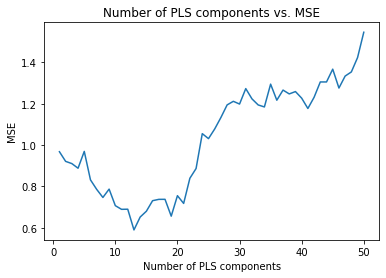

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [25]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(x, y_d13c_max, 50)


In [26]:
x1_d13c_max = opt_Xc_d13c_max[0:80,:]
x2_d13c_max = opt_Xc_d13c_max[80:160,:]
x3_d13c_max = opt_Xc_d13c_max[160:240,:]
x4_d13c_max = opt_Xc_d13c_max[240:550,:]

y1_d13c_max = y_d13c_max[0:80,:]
y2_d13c_max = y_d13c_max[80:160,:]
y3_d13c_max = y_d13c_max[160:240,:]
y4_d13c_max = y_d13c_max[240:550,:]

R2 calib: 0.692
R2 CV: 0.409
MSE calib: 0.305
MSE CV: 0.585
[-14.21398006] [0.50165939]
None
0 site1b [-29.58794009] [-30.38621343289968 'd13c_site1b_07_025.tif']
1 site1b [-29.99984464] [-29.93289901554818 'd13c_site1b_09_028.tif']
2 site1b [-28.43226191] [-27.834619777318643 'd13c_site1b_14_053.tif']
3 site1b [-29.06028246] [-28.344666013268768 'd13c_site1b_17_025.tif']
4 site1b [-26.8903602] [-27.6056542851619 'd13c_site1b_18_046.tif']
5 site1b [-26.64471285] [-27.61386140514241 'd13c_site1b_18_048.tif']
6 site1b [-26.67135499] [-27.33462376745949 'd13c_site1b_18_051.tif']
7 site1b [-29.12107919] [-29.990448463820357 'd13c_site1b_19_030.tif']
8 site1b [-29.57672624] [-28.303077487020065 'd13c_site1b_19_063.tif']
9 site1b [-28.03560705] [-29.891432140655 'd13c_site1b_21_018.tif']
10 site1b [-28.66516384] [-29.188668087763894 'd13c_site1b_21_034.tif']
11 site1b [-29.37993418] [-27.61686681525815 'd13c_site1b_21_052.tif']
12 site1b [-28.57760131] [-28.518333222998958 'd13c_site1b_22_03

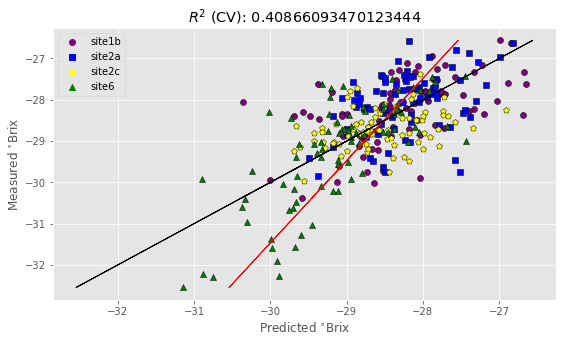

In [27]:
file_name_d13c_mean = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/d13c_mean_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
                             y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
                             ncomp_d13c_max, labels, file_name_d13c_mean)

In [65]:
optimal_pls_d13c_max  = PLSRegression(n_components=13)
optimal_pls_d13c_max.fit(opt_Xc_d13c_max, y_d13c_max[:, 0].astype(np.float64))

coefficients_d13c_max = optimal_pls_d13c_max.coef_[:,0]
bands_d13c_max = band_name[sorted_ind_d13c_max][wav_d13c_max:]

print(coefficients_d13c_max.shape, bands_d13c_max.shape)

coefficients_d13c_max

(83,) (83,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.32957037,  1.32806195,  1.28708514,  2.5779333 ,  2.27818266,
       -1.32053661, -1.89663513,  0.18996578, -0.08387524, -1.39036655,
        2.04713968, -1.19878832,  0.78937835,  1.69256306,  1.07721265,
       -1.34328938, -0.68312019, -1.89202658,  0.03424643, -0.28819875,
       -1.45492956, -2.32669999, -1.13834136,  0.54748235,  0.98311593,
        0.4053924 , -1.46046251,  0.25294882,  1.15511681, -0.64386119,
        0.23728153, -1.35423488,  1.03659965, -2.29701225,  1.01091279,
       -1.00657955,  2.46585499,  2.12852642,  2.15207039, -1.24947508,
        1.42563037,  0.3964758 , -1.16362663,  1.40494824,  2.0580413 ,
       -0.71218794,  1.97097288,  0.78272292,  1.75673617,  1.09546483,
        0.76211528,  2.07945737,  0.55495137, -2.89019374, -0.98759895,
       -1.43749448,  1.65565936, -0.68320947, -1.50739587, -1.48641045,
        2.03530164, -2.24516637,  2.25705501, -2.6167591 , -2.05021735,
        1.79485223, -2.74783908, -1.97908665,  1.05359011, -2.03

In [66]:
optimal_pls_d13c_max.intercept_

array([-28.57706857])

In [67]:
bands_d13c_max

array(['band_111', 'band_163', 'band_282', 'band_279', 'band_345',
       'band_276', 'band_232', 'band_54', 'band_20', 'band_360',
       'band_136', 'band_396', 'band_60', 'band_390', 'band_149',
       'band_132', 'band_26', 'band_50', 'band_142', 'band_32', 'band_52',
       'band_35', 'band_144', 'band_18', 'band_42', 'band_37', 'band_230',
       'band_67', 'band_216', 'band_79', 'band_125', 'band_376',
       'band_143', 'band_135', 'band_161', 'band_284', 'band_334',
       'band_82', 'band_96', 'band_327', 'band_101', 'band_68',
       'band_348', 'band_401', 'band_231', 'band_152', 'band_104',
       'band_28', 'band_381', 'band_404', 'band_29', 'band_185',
       'band_281', 'band_105', 'band_62', 'band_362', 'band_112',
       'band_363', 'band_108', 'band_30', 'band_48', 'band_338',
       'band_180', 'band_165', 'band_93', 'band_27', 'band_170',
       'band_388', 'band_386', 'band_379', 'band_153', 'band_22',
       'band_242', 'band_39', 'band_118', 'band_147', 'band_39

In [102]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_d13c_max]

print(adjusted_bands)

[110, 162, 281, 278, 344, 275, 231, 53, 19, 359, 135, 395, 59, 389, 148, 131, 25, 49, 141, 31, 51, 34, 143, 17, 41, 36, 229, 66, 215, 78, 124, 375, 142, 134, 160, 283, 333, 81, 95, 326, 100, 67, 347, 400, 230, 151, 103, 27, 380, 403, 28, 184, 280, 104, 61, 361, 111, 362, 107, 29, 47, 337, 179, 164, 92, 26, 169, 387, 385, 378, 152, 21, 241, 38, 117, 146, 393, 372, 392, 115, 371, 397, 270]


# d13 std

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  278
Optimised MSEP  0.21776909038334344



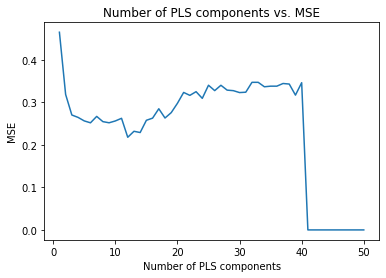

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [28]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_std, 50)

In [29]:
x1_d13c_std = opt_Xc_d13c_std[0:80,:]
x2_d13c_std = opt_Xc_d13c_std[80:160,:]
x3_d13c_std = opt_Xc_d13c_std[160:240,:]
x4_d13c_std = opt_Xc_d13c_std[240:550,:]

y1_d13c_std = y_d13c_std[0:80,:]
y2_d13c_std = y_d13c_std[80:160,:]
y3_d13c_std = y_d13c_std[160:240,:]
y4_d13c_std = y_d13c_std[240:550,:]

R2 calib: 0.744
R2 CV: 0.622
MSE calib: 0.139
MSE CV: 0.205
[0.78404777] [0.6666196]
None
0 site1b [2.05918656] [1.9137644154466282 'd13c_site1b_07_025.tif']
1 site1b [1.95017929] [1.3546828796736816 'd13c_site1b_09_028.tif']
2 site1b [1.84898781] [2.5178205264005986 'd13c_site1b_14_053.tif']
3 site1b [1.54155129] [1.344436561822875 'd13c_site1b_17_025.tif']
4 site1b [1.60098624] [1.6078498876571843 'd13c_site1b_18_046.tif']
5 site1b [1.95140723] [1.2741230394609675 'd13c_site1b_18_048.tif']
6 site1b [1.60650883] [1.3814174952401728 'd13c_site1b_18_051.tif']
7 site1b [1.83109006] [1.7931200221557553 'd13c_site1b_19_030.tif']
8 site1b [1.79959517] [1.5437238589103532 'd13c_site1b_19_063.tif']
9 site1b [2.13214437] [1.5199209618023377 'd13c_site1b_21_018.tif']
10 site1b [2.20805543] [1.8280471281766617 'd13c_site1b_21_034.tif']
11 site1b [2.050651] [2.4531580008419005 'd13c_site1b_21_052.tif']
12 site1b [1.99493451] [1.5049779501679776 'd13c_site1b_22_035.tif']
13 site1b [2.09373498] [2.

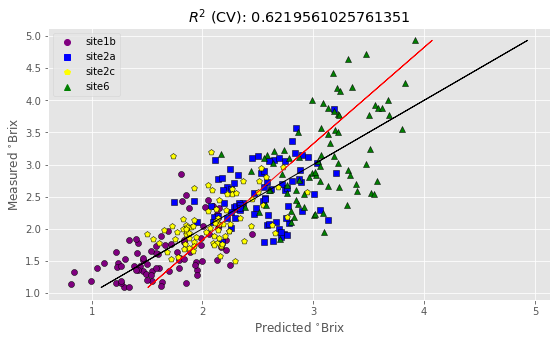

In [30]:
file_name_d13c_std = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
                             y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
                             ncomp_d13c_std, labels,file_name_d13c_std)

In [68]:
optimal_pls_d13c_std  = PLSRegression(n_components=12)
optimal_pls_d13c_std.fit(opt_Xc_d13c_std, y_d13c_std[:, 0].astype(np.float64))

coefficients_d13c_std = optimal_pls_d13c_std.coef_[:,0]
bands_d13c_std = band_name[sorted_ind_d13c_std][wav_d13c_std:]

print(coefficients_d13c_std.shape, bands_d13c_std.shape)


coefficients_d13c_std

(41,) (41,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-1.61842137,  2.34992339,  0.37460436, -0.57252926, -1.24338289,
        0.70119625,  1.91445857,  0.56027119, -1.2568706 ,  0.93921947,
        0.28597875,  0.88529189, -2.8613245 ,  0.46999553,  0.76825802,
        1.30390296,  0.85128939,  0.35969478,  1.66567527, -1.03783374,
        0.02943911, -1.17453643, -0.05758053, -1.43760799, -2.16634721,
       -1.72749249, -0.63693612,  1.71452991,  0.92806445,  1.36850908,
       -0.72098098, -0.80128684,  0.05484442,  1.23972708,  1.38557017,
        0.79245803, -1.84955153,  2.40707451, -1.33093403, -1.95064835,
       -0.92703726])

In [69]:
optimal_pls_d13c_std.intercept_

array([2.34270111])

In [70]:
bands_d13c_std

array(['band_343', 'band_54', 'band_87', 'band_378', 'band_36',
       'band_277', 'band_158', 'band_219', 'band_89', 'band_152',
       'band_25', 'band_390', 'band_169', 'band_16', 'band_398',
       'band_120', 'band_56', 'band_116', 'band_31', 'band_221',
       'band_29', 'band_33', 'band_185', 'band_136', 'band_356',
       'band_364', 'band_117', 'band_256', 'band_118', 'band_125',
       'band_222', 'band_393', 'band_66', 'band_381', 'band_389',
       'band_223', 'band_173', 'band_225', 'band_224', 'band_51',
       'band_23'], dtype='<U8')

In [103]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_d13c_std]

print(adjusted_bands)

[342, 53, 86, 377, 35, 276, 157, 218, 88, 151, 24, 389, 168, 15, 397, 119, 55, 115, 30, 220, 28, 32, 184, 135, 355, 363, 116, 255, 117, 124, 221, 392, 65, 380, 388, 222, 172, 224, 223, 50, 22]


# d15n

In [31]:
d15n_trait_pdf_ymax = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_d15n.npy',  allow_pickle=True)

In [32]:
y_d15n_max1 = np.array(d15n_trait_pdf_ymax)
y_d15n_std1 = np.array(d15n_trait_pdf_std)

In [33]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_max1 = y_d15n_max1[0:80, :]
site2a_y_d15n_max1 = y_d15n_max1[80:160, :]
site2c_y_d15n_max1 = y_d15n_max1[160:240,:]
site6_y_d15n_max1_1 = y_d15n_max1[240:320,:]

y_d15n_max = np.vstack((site1b_y_d15n_max1, site2a_y_d15n_max1,site2c_y_d15n_max1,site6_y_d15n_max1_1))
# site2c_x = x[]
y_d15n_max.shape

(320, 2)

In [34]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_std1 = y_d15n_std1[0:80, :]
site2a_y_d15n_std1 = y_d15n_std1[80:160, :]
site2c_y_d15n_std1 = y_d15n_std1[160:240,:]
site6_y_d15n_std1_1 = y_d15n_std1[240:320,:]

y_d15n_std = np.vstack((site1b_y_d15n_std1, site2a_y_d15n_std1,site2c_y_d15n_std1,site6_y_d15n_std1_1))
# site2c_x = x[]
y_d15n_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  9
Wavelengths to be discarded  278
Optimised MSEP  4.351603003318919



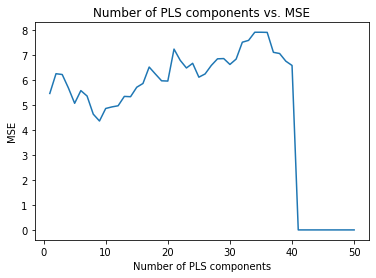

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [35]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(x, y_d15n_max, 50)
x1_d15n_max = opt_Xc_d15n_max[0:80,:]
x2_d15n_max = opt_Xc_d15n_max[80:160,:]
x3_d15n_max = opt_Xc_d15n_max[160:240,:]
x4_d15n_max = opt_Xc_d15n_max[240:550,:]

y1_d15n_max = y_d15n_max[0:80,:]
y2_d15n_max = y_d15n_max[80:160,:]
y3_d15n_max = y_d15n_max[160:240,:]
y4_d15n_max = y_d15n_max[240:550,:]

R2 calib: 0.657
R2 CV: 0.560
MSE calib: 3.081
MSE CV: 3.956
[-1.1712669] [0.61035516]
None
0 site1b [0.19833322] [5.945766407619651 'd15n_site1b_07_025.tif']
1 site1b [1.88623613] [2.3300468426670644 'd15n_site1b_09_028.tif']
2 site1b [-3.79212345] [-4.8908962511847704 'd15n_site1b_14_053.tif']
3 site1b [-1.56546545] [-1.4544518946908624 'd15n_site1b_17_025.tif']
4 site1b [-5.42581058] [-6.9091950596523635 'd15n_site1b_18_046.tif']
5 site1b [-7.27859152] [-5.898394082206776 'd15n_site1b_18_048.tif']
6 site1b [-6.12712908] [-7.040214587625911 'd15n_site1b_18_051.tif']
7 site1b [2.288033] [8.76088281578191 'd15n_site1b_19_030.tif']
8 site1b [-0.51020532] [-3.0827365948791297 'd15n_site1b_19_063.tif']
9 site1b [3.02117483] [3.4545877534351783 'd15n_site1b_21_018.tif']
10 site1b [1.43737846] [0.3622621152554686 'd15n_site1b_21_034.tif']
11 site1b [-3.60719946] [-4.11087047003398 'd15n_site1b_21_052.tif']
12 site1b [0.29922246] [-3.086037504274687 'd15n_site1b_22_035.tif']
13 site1b [-2.670

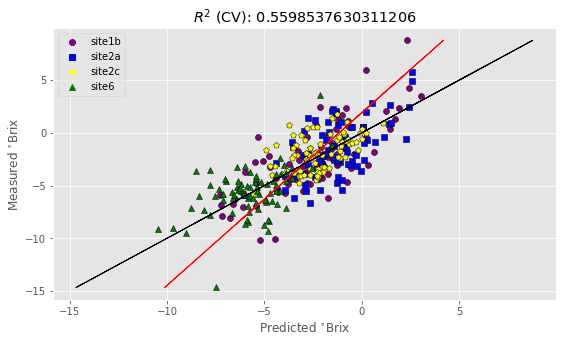

In [36]:
file_name_d15n_max = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/d15n_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
                             y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
                             ncomp_d15n_max, labels, file_name_d15n_max)

In [71]:
optimal_pls_d15n_max  = PLSRegression(n_components=9)
optimal_pls_d15n_max.fit(opt_Xc_d15n_max, y_d15n_max[:, 0].astype(np.float64))

coefficients_d15n_max = optimal_pls_d15n_max.coef_[:,0]
bands_d15n_max = band_name[sorted_ind_d15n_max][wav_d15n_max:]

print(coefficients_d15n_max.shape, bands_d15n_max.shape)

coefficients_d15n_max

(41,) (41,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-2.6100907 ,  3.99703328,  1.4349977 , -2.54483943, -1.78653457,
       -3.56910201, -0.40839432,  1.18743516,  3.73044813, -2.70397561,
        2.56784475,  1.94569987, -1.53527747,  3.04782112,  4.59063496,
       -4.12197404,  2.4064484 ,  1.02827652,  3.25791672, -0.93310936,
       -4.00559188, -1.91766533,  2.30634927, -1.08765701,  4.04702167,
        3.28529536, -3.33936444, -3.92832414,  4.08256706, -3.20154709,
       -3.29546118,  4.32316181, -4.55485096,  3.66073386, -1.09926079,
       -4.33849549,  2.93863394,  4.1469652 , -6.15795855,  4.10784446,
       -5.90214109])

In [72]:
optimal_pls_d15n_max.intercept_

array([-2.92215452])

In [73]:
bands_d15n_max

array(['band_271', 'band_135', 'band_327', 'band_33', 'band_141',
       'band_226', 'band_90', 'band_113', 'band_134', 'band_116',
       'band_26', 'band_50', 'band_393', 'band_158', 'band_338',
       'band_45', 'band_247', 'band_154', 'band_62', 'band_104',
       'band_18', 'band_326', 'band_35', 'band_151', 'band_132',
       'band_30', 'band_148', 'band_142', 'band_237', 'band_273',
       'band_269', 'band_36', 'band_223', 'band_283', 'band_401',
       'band_216', 'band_32', 'band_25', 'band_42', 'band_218', 'band_37'],
      dtype='<U8')

In [104]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_d15n_max]

print(adjusted_bands)

[270, 134, 326, 32, 140, 225, 89, 112, 133, 115, 25, 49, 392, 157, 337, 44, 246, 153, 61, 103, 17, 325, 34, 150, 131, 29, 147, 141, 236, 272, 268, 35, 222, 282, 400, 215, 31, 24, 41, 217, 36]


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  260
Optimised MSEP  1.2826302100156421



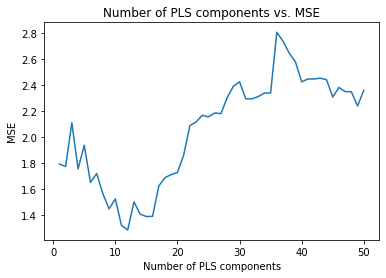

R2 calib: 0.613
R2 CV: 0.346
MSE calib: 0.662
MSE CV: 1.119
[2.306696] [0.47856325]
None
0 site1b [6.49950436] [5.463369750754628 'd15n_site1b_07_025.tif']
1 site1b [3.26787841] [2.7790890639647916 'd15n_site1b_09_028.tif']
2 site1b [6.37850515] [4.959482925373863 'd15n_site1b_14_053.tif']
3 site1b [3.02254159] [2.785914499632209 'd15n_site1b_17_025.tif']
4 site1b [4.32991735] [4.09292571627741 'd15n_site1b_18_046.tif']
5 site1b [4.31303531] [3.333241981250653 'd15n_site1b_18_048.tif']
6 site1b [3.36346289] [3.8960618254293697 'd15n_site1b_18_051.tif']
7 site1b [4.34209598] [5.03382930805713 'd15n_site1b_19_030.tif']
8 site1b [5.00489376] [4.797916172688152 'd15n_site1b_19_063.tif']
9 site1b [4.51760667] [3.4773335603046895 'd15n_site1b_21_018.tif']
10 site1b [4.64580612] [5.9459923346071095 'd15n_site1b_21_034.tif']
11 site1b [4.32662202] [4.032403147883678 'd15n_site1b_21_052.tif']
12 site1b [4.35446874] [3.5556962429452934 'd15n_site1b_22_035.tif']
13 site1b [5.39030507] [5.49160268

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(



63 site1b [4.2006037] [3.04975849092095 'd15n_site1b_49_039.tif']
64 site1b [4.40201422] [4.675203621752879 'd15n_site1b_49_040.tif']
65 site1b [3.94310758] [6.472473589150623 'd15n_site1b_49_084.tif']
66 site1b [4.42632272] [5.624900418484457 'd15n_site1b_49_094.tif']
67 site1b [4.101224] [3.9158990273831265 'd15n_site1b_51_061.tif']
68 site1b [3.73777577] [3.5467415727379596 'd15n_site1b_51_075.tif']
69 site1b [4.67839986] [3.887401401310865 'd15n_site1b_52_044.tif']
70 site1b [3.84252517] [2.4283318254872706 'd15n_site1b_53_065.tif']
71 site1b [4.3162259] [6.054187277258321 'd15n_site1b_53_078.tif']
72 site1b [3.37832908] [3.963225997676228 'd15n_site1b_54_048.tif']
73 site1b [2.17848841] [2.9168013765357315 'd15n_site1b_54_065.tif']
74 site1b [2.17848841] [2.6241347330940035 'd15n_site1b_54_066.tif']
75 site1b [3.63377086] [5.346436280765554 'd15n_site1b_54_089.tif']
76 site1b [3.84640252] [2.9851305202021194 'd15n_site1b_55_066.tif']
77 site1b [2.99407831] [3.0441830626071966 'd1

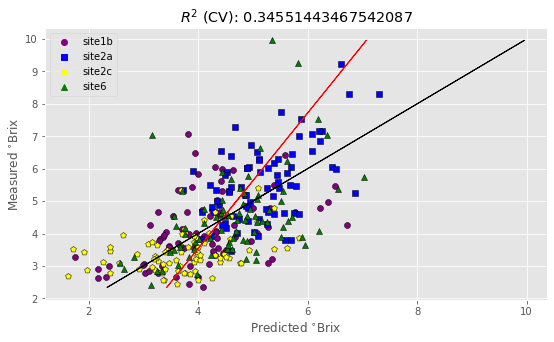

In [37]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 50)

x1_d15n_std = opt_Xc_d15n_std[0:80,:]
x2_d15n_std = opt_Xc_d15n_std[80:160,:]
x3_d15n_std = opt_Xc_d15n_std[160:240,:]
x4_d15n_std = opt_Xc_d15n_std[240:550,:]

y1_d15n_std = y_d15n_std[0:80,:]
y2_d15n_std = y_d15n_std[80:160,:]
y3_d15n_std = y_d15n_std[160:240,:]
y4_d15n_std = y_d15n_std[240:550,:]


file_name_d15n_std = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/d15n_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
                             y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
                             ncomp_d15n_std, labels, file_name_d15n_std)

In [74]:
optimal_pls_d15n_std  = PLSRegression(n_components=12)
optimal_pls_d15n_std.fit(opt_Xc_d15n_std, y_d15n_std[:, 0].astype(np.float64))

coefficients_d15n_std = optimal_pls_d15n_std.coef_[:,0]
bands_d15n_std = band_name[sorted_ind_d15n_std][wav_d15n_std:]

print(coefficients_d15n_std.shape, bands_d15n_std.shape)

coefficients_d15n_std

(59,) (59,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-1.05614524,  4.65277327,  1.24998293, -1.13666611,  0.76052679,
       -2.3126664 , -1.63416796, -1.61879886,  2.79406869,  0.71681508,
       -1.04804697,  1.80629352,  0.99265173,  1.3861967 , -0.42439592,
        1.62330322,  1.49726495, -0.19283405,  1.31534266,  3.58159434,
       -2.65165071,  2.70318368,  1.0454947 , -1.67367695, -1.29678945,
        5.00621145, -2.2015588 ,  1.92293462, -2.72879664, -2.90788662,
        2.6392004 ,  1.67779797,  2.22704788, -1.95687998,  1.99064588,
       -3.55185514,  2.19725866, -3.23322754,  1.38292991,  0.72436681,
       -3.12686335, -0.81001763, -3.21418882, -1.67714782,  1.27198155,
       -2.82041625,  1.22620561,  3.50361338, -3.31980188, -1.00731968,
       -0.7657634 ,  1.94231485,  1.57565155,  2.92437775, -2.710253  ,
       -1.70616115, -3.14099508,  2.65107333, -4.85705174])

In [75]:
optimal_pls_d15n_std.intercept_

array([4.37888794])

In [76]:
bands_d15n_std

array(['band_179', 'band_237', 'band_235', 'band_365', 'band_70',
       'band_66', 'band_154', 'band_265', 'band_225', 'band_390',
       'band_357', 'band_125', 'band_269', 'band_128', 'band_284',
       'band_227', 'band_226', 'band_93', 'band_223', 'band_43',
       'band_178', 'band_53', 'band_99', 'band_47', 'band_221',
       'band_254', 'band_366', 'band_148', 'band_176', 'band_349',
       'band_277', 'band_217', 'band_56', 'band_109', 'band_398',
       'band_356', 'band_389', 'band_224', 'band_142', 'band_153',
       'band_362', 'band_384', 'band_51', 'band_364', 'band_132',
       'band_363', 'band_152', 'band_54', 'band_46', 'band_220',
       'band_183', 'band_31', 'band_394', 'band_27', 'band_29',
       'band_360', 'band_23', 'band_391', 'band_169'], dtype='<U8')

In [105]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_d15n_std]

print(adjusted_bands)

[178, 236, 234, 364, 69, 65, 153, 264, 224, 389, 356, 124, 268, 127, 283, 226, 225, 92, 222, 42, 177, 52, 98, 46, 220, 253, 365, 147, 175, 348, 276, 216, 55, 108, 397, 355, 388, 223, 141, 152, 361, 383, 50, 363, 131, 362, 151, 53, 45, 219, 182, 30, 393, 26, 28, 359, 22, 390, 168]


# LA

In [38]:
la_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_la.npy',  allow_pickle=True)

In [39]:
y_la_max1 = np.array(la_trait_pdf_ymax)

y_la_std1 = np.array(la_trait_pdf_std)

In [40]:
y_la_max1.shape

(320, 2)

In [41]:
# vertically stack two section of arrays to create a new array
site1b_y_la_max1 = y_la_max1[0:80, :]
site2a_y_la_max1 = y_la_max1[80:160, :]
site2c_y_la_max1 = y_la_max1[160:240,:]
site6_y_la_max1_1 = y_la_max1[240:550,:]
# site6_y_la_max1_2 = y_la_max1[3394:3574,:]
y_la_max = np.vstack((site1b_y_la_max1, site2a_y_la_max1,site2c_y_la_max1,site6_y_la_max1_1))
# site2c_x = x[]
y_la_max.shape

(320, 2)

In [42]:
# vertically stack two section of arrays to create a new array
site1b_y_la_std1 = y_la_std1[0:80, :]
site2a_y_la_std1 = y_la_std1[80:160, :]
site2c_y_la_std1 = y_la_std1[160:240,:]
site6_y_la_std1_1 = y_la_std1[240:550,:]

y_la_std = np.vstack((site1b_y_la_std1, site2a_y_la_std1,site2c_y_la_std1,site6_y_la_std1_1))
# site2c_x = x[]
y_la_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  13
Wavelengths to be discarded  264
Optimised MSEP  1.2191731673875652



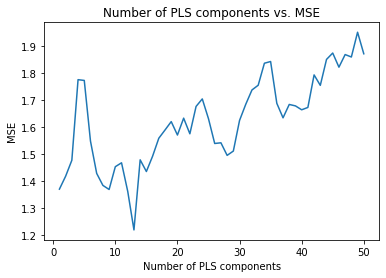

R2 calib: 0.537
R2 CV: 0.309
MSE calib: 0.739
MSE CV: 1.102
[1.20320931] [0.41564083]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [0.55365732] [-1.3025150346019707 'la_site1b_07_025.tif']
1 site1b [1.06332779] [0.6038912419128248 'la_site1b_09_028.tif']
2 site1b [2.16966715] [2.000516401938687 'la_site1b_14_053.tif']
3 site1b [1.94732852] [2.5554487522467637 'la_site1b_17_025.tif']
4 site1b [3.82606766] [4.633861874749844 'la_site1b_18_046.tif']
5 site1b [3.58969934] [3.481872083556283 'la_site1b_18_048.tif']
6 site1b [3.17899209] [3.6914176591461483 'la_site1b_18_051.tif']
7 site1b [0.16278134] [-0.8209646159127342 'la_site1b_19_030.tif']
8 site1b [2.25241224] [1.8965262694505536 'la_site1b_19_063.tif']
9 site1b [1.19326947] [0.29990198879922225 'la_site1b_21_018.tif']
10 site1b [1.34272122] [-0.4350900807064271 'la_site1b_21_034.tif']
11 site1b [3.23183179] [3.8166930018798935 'la_site1b_21_052.tif']
12 site1b [1.50625243] [2.1918389806186234 'la_site1b_22_035.tif']
13 site1b [2.9133999] [3.057714099162281 'la_site1b_22_037.tif']
14 site1b [2.34056352] [1.006911963213497 'la_site1b_22_038.tif']
15 site

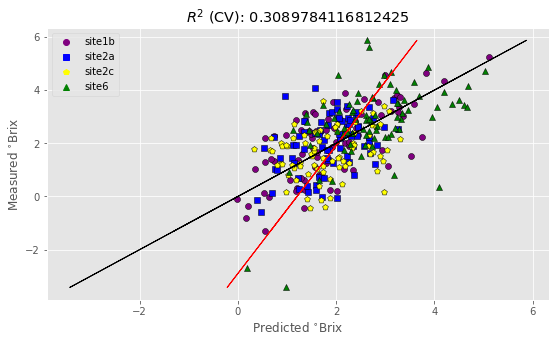

In [43]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(x, y_la_max, 50)
x1_la_max = opt_Xc_la_max[0:80,:]
x2_la_max = opt_Xc_la_max[80:160,:]
x3_la_max = opt_Xc_la_max[160:240,:]
x4_la_max = opt_Xc_la_max[240:550,:]

y1_la_max = y_la_max[0:80,:]
y2_la_max = y_la_max[80:160,:]
y3_la_max = y_la_max[160:240,:]
y4_la_max = y_la_max[240:550,:]
file_name_la_max = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/la_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
                             y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
                             ncomp_la_max, labels,file_name_la_max)

In [77]:
optimal_pls_la_max  = PLSRegression(n_components=13)
optimal_pls_la_max.fit(opt_Xc_la_max, y_la_max[:, 0].astype(np.float64))

coefficients_la_max = optimal_pls_la_max.coef_[:,0]
bands_la_max = band_name[sorted_ind_la_max][wav_la_max:]

print(coefficients_la_max.shape, bands_la_max.shape)

coefficients_la_max

(55,) (55,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 3.89243561, -2.22413978,  0.82535463,  1.12032819, -2.99596678,
        2.35196889, -4.17750724, -2.37914832,  2.19880808,  1.81720086,
       -1.59498261, -1.26107386,  1.41615855, -0.04879487,  0.58167647,
       -2.71208018, -2.98491341, -1.47319095, -3.06330067, -0.31457622,
        1.18954635, -0.29934517,  5.36491869,  1.82670941, -0.26509865,
       -2.37506446, -2.35416179,  2.55481874,  1.06432519,  1.96964699,
        0.54029174,  0.96233738, -3.29740603, -2.02809259,  2.00847948,
        2.83542492, -2.12453704, -1.19995926, -4.86280889,  1.3569935 ,
       -1.47163464,  2.63463554,  3.05607612,  1.58701655,  4.65477448,
        4.68599071, -4.67602697,  0.44826324, -4.24286945,  2.62356367,
        2.81607757, -5.06530278,  3.36195172, -4.77770733,  2.71454266])

In [78]:
bands_la_max

array(['band_85', 'band_62', 'band_385', 'band_394', 'band_158',
       'band_178', 'band_276', 'band_108', 'band_377', 'band_216',
       'band_251', 'band_35', 'band_401', 'band_344', 'band_221',
       'band_21', 'band_243', 'band_170', 'band_278', 'band_220',
       'band_109', 'band_388', 'band_98', 'band_161', 'band_346',
       'band_65', 'band_31', 'band_83', 'band_116', 'band_66', 'band_390',
       'band_141', 'band_119', 'band_20', 'band_222', 'band_267',
       'band_247', 'band_115', 'band_84', 'band_42', 'band_361',
       'band_226', 'band_269', 'band_395', 'band_271', 'band_354',
       'band_373', 'band_142', 'band_338', 'band_18', 'band_37',
       'band_372', 'band_223', 'band_88', 'band_27'], dtype='<U8')

In [106]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_la_max]

print(adjusted_bands)

[84, 61, 384, 393, 157, 177, 275, 107, 376, 215, 250, 34, 400, 343, 220, 20, 242, 169, 277, 219, 108, 387, 97, 160, 345, 64, 30, 82, 115, 65, 389, 140, 118, 19, 221, 266, 246, 114, 83, 41, 360, 225, 268, 394, 270, 353, 372, 141, 337, 17, 36, 371, 222, 87, 26]


In [114]:
optimal_pls_la_max.intercept_

array([2.12685355])

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  260
Optimised MSEP  0.29781914144708566



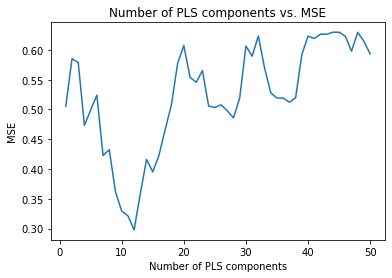

R2 calib: 0.669
R2 CV: 0.481
MSE calib: 0.175
MSE CV: 0.275
[1.1046375] [0.58200088]
None
0 site1b [2.55636124] [2.269738388390909 'la_site1b_07_025.tif']
1 site1b [1.85191068] [1.5609154604887663 'la_site1b_09_028.tif']
2 site1b [3.54632844] [2.790657429256725 'la_site1b_14_053.tif']
3 site1b [2.07166147] [1.6653801416503442 'la_site1b_17_025.tif']
4 site1b [2.33393204] [2.368330885324841 'la_site1b_18_046.tif']
5 site1b [2.6890086] [1.6643907417917736 'la_site1b_18_048.tif']
6 site1b [2.12593409] [1.90935502700433 'la_site1b_18_051.tif']
7 site1b [2.2516789] [2.1226277417347483 'la_site1b_19_030.tif']
8 site1b [2.14050745] [2.340991246776186 'la_site1b_19_063.tif']
9 site1b [2.45843999] [2.057544517376318 'la_site1b_21_018.tif']
10 site1b [2.67199555] [3.028773689752706 'la_site1b_21_034.tif']
11 site1b [2.41804419] [2.5757256211144974 'la_site1b_21_052.tif']
12 site1b [2.30908517] [1.9725561811780488 'la_site1b_22_035.tif']
13 site1b [3.0082527] [2.8890281856884705 'la_site1b_22_037

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


site1b [2.33245712] [2.4414019513367675 'la_site1b_25_028.tif']
22 site1b [2.00727879] [2.425137288696137 'la_site1b_25_044.tif']
23 site1b [1.93113563] [1.7708356166309762 'la_site1b_26_044.tif']
24 site1b [1.73874897] [2.254485529055317 'la_site1b_26_061.tif']
25 site1b [3.14964343] [1.9336049769956505 'la_site1b_29_035.tif']
26 site1b [1.07562302] [1.525746095763593 'la_site1b_30_021.tif']
27 site1b [2.74041898] [3.342298339268943 'la_site1b_30_037.tif']
28 site1b [1.77549755] [2.015520419544729 'la_site1b_30_084.tif']
29 site1b [3.01676421] [2.8088987043628704 'la_site1b_32_039.tif']
30 site1b [2.08814457] [1.9180505932118115 'la_site1b_32_087.tif']
31 site1b [1.99442139] [1.9149858205612715 'la_site1b_33_026.tif']
32 site1b [2.36325963] [1.9564152319090113 'la_site1b_34_029.tif']
33 site1b [2.9072206] [2.095208143484253 'la_site1b_34_043.tif']
34 site1b [1.87130759] [1.8673190364110555 'la_site1b_34_087.tif']
35 site1b [2.40884537] [2.4388972873007 'la_site1b_35_045.tif']
36 site1

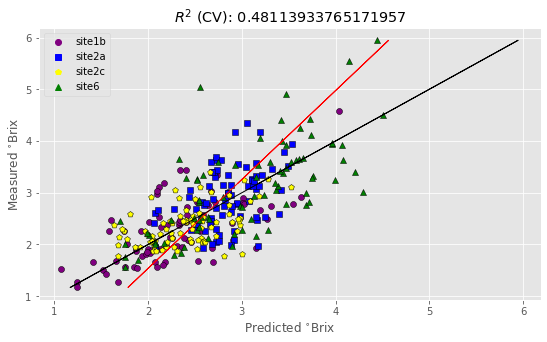

In [44]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(x, y_la_std, 50)

x1_la_std = opt_Xc_la_std[0:80,:]
x2_la_std = opt_Xc_la_std[80:160,:]
x3_la_std = opt_Xc_la_std[160:240,:]
x4_la_std = opt_Xc_la_std[240:550,:]

y1_la_std = y_la_std[0:80,:]
y2_la_std = y_la_std[80:160,:]
y3_la_std = y_la_std[160:240,:]
y4_la_std = y_la_std[240:550,:]
file_name_la_std = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/la_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
                             y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
                             ncomp_la_std, labels, file_name_la_std)

In [80]:
optimal_pls_la_std  = PLSRegression(n_components=12)
optimal_pls_la_std.fit(opt_Xc_la_std, y_la_std[:, 0].astype(np.float64))

coefficients_la_std = optimal_pls_la_std.coef_[:,0]
bands_la_std = band_name[sorted_ind_la_std][wav_la_std:]

print(coefficients_la_std.shape, bands_la_std.shape)

coefficients_la_std

(59,) (59,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.44263378,  0.10861067, -0.64236789, -0.40071221, -1.10220799,
        0.49987805,  0.53387364,  0.02539234,  1.31220775, -2.02000062,
        0.90919957, -1.07020048,  0.76551011, -1.0951443 , -1.85530154,
       -0.84868168,  0.69599164, -0.98251854, -1.24163351,  0.91551278,
        1.39258206, -0.85095039,  2.27326933,  1.64254083, -0.81806133,
        1.06123091,  0.72353523,  1.58710786, -0.86271343,  1.43672354,
        1.67901983,  2.05280323, -1.25893018, -1.71398398, -0.86766162,
        0.31165589, -1.06884881,  1.25162144,  1.22592347,  1.21292416,
        0.57036178, -1.99420645,  1.24950141, -1.38404056, -1.22824879,
        0.52686344,  1.88649026, -1.50867789, -2.11810245,  1.79135092,
        0.82002228, -1.21155704, -1.39211904, -1.71063787,  1.32324887,
       -1.92686202,  1.04732311,  1.1406722 , -1.18716785])

In [81]:
bands_la_std

array(['band_149', 'band_338', 'band_67', 'band_343', 'band_156',
       'band_152', 'band_148', 'band_111', 'band_180', 'band_51',
       'band_24', 'band_183', 'band_31', 'band_364', 'band_368',
       'band_345', 'band_219', 'band_384', 'band_26', 'band_71',
       'band_225', 'band_221', 'band_54', 'band_137', 'band_36',
       'band_226', 'band_103', 'band_223', 'band_47', 'band_379',
       'band_43', 'band_244', 'band_160', 'band_349', 'band_66',
       'band_45', 'band_29', 'band_27', 'band_381', 'band_140',
       'band_165', 'band_356', 'band_52', 'band_176', 'band_360',
       'band_133', 'band_256', 'band_178', 'band_93', 'band_50',
       'band_116', 'band_64', 'band_157', 'band_169', 'band_277',
       'band_224', 'band_391', 'band_216', 'band_23'], dtype='<U8')

In [107]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_la_std]

print(adjusted_bands)

[148, 337, 66, 342, 155, 151, 147, 110, 179, 50, 23, 182, 30, 363, 367, 344, 218, 383, 25, 70, 224, 220, 53, 136, 35, 225, 102, 222, 46, 378, 42, 243, 159, 348, 65, 44, 28, 26, 380, 139, 164, 355, 51, 175, 359, 132, 255, 177, 92, 49, 115, 63, 156, 168, 276, 223, 390, 215, 22]


In [82]:
optimal_pls_la_std.intercept_

array([2.65538838])

# SLA

In [45]:
sla_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_sla.npy',  allow_pickle=True)

In [46]:
y_sla_max1 = np.array(sla_trait_pdf_ymax)
y_sla_std1 = np.array(sla_trait_pdf_std)

In [47]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_max1 = y_sla_max1[0:80, :]
site2a_y_sla_max1 = y_sla_max1[80:160, :]
site2c_y_sla_max1 = y_sla_max1[160:240,:]
site6_y_sla_max1_1 = y_sla_max1[240:550,:]
# site6_y_sla_max1_2 = y_sla_max1[3394:3574,:]
y_sla_max = np.vstack((site1b_y_sla_max1, site2a_y_sla_max1,site2c_y_sla_max1,site6_y_sla_max1_1))
# site2c_x = x[]
y_sla_max.shape

(320, 2)

In [48]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_std1 = y_sla_std1[0:80, :]
site2a_y_sla_std1 = y_sla_std1[80:160, :]
site2c_y_sla_std1 = y_sla_std1[160:240,:]
site6_y_sla_std1_1 = y_sla_std1[240:550,:]
# site6_y_sla_std1_2 = y_sla_std1[3394:3574,:]
y_sla_std = np.vstack((site1b_y_sla_std1, site2a_y_sla_std1,site2c_y_sla_std1,site6_y_sla_std1_1))
# site2c_x = x[]
y_sla_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  9
Wavelengths to be discarded  246
Optimised MSEP  0.020012882702740074



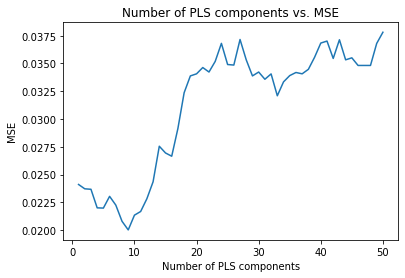

R2 calib: 0.610
R2 CV: 0.474
MSE calib: 0.014
MSE CV: 0.019
[2.26775631] [0.50747517]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [4.51338089] [4.342863277805006 'sla_site1b_07_025.tif']
1 site1b [4.22387332] [4.232808973396793 'sla_site1b_09_028.tif']
2 site1b [4.59530258] [4.912618591004365 'sla_site1b_14_053.tif']
3 site1b [4.44041392] [4.335737816507129 'sla_site1b_17_025.tif']
4 site1b [4.88369949] [4.834475587570716 'sla_site1b_18_046.tif']
5 site1b [4.9571547] [4.84138900202012 'sla_site1b_18_048.tif']
6 site1b [4.84549026] [4.832500013307101 'sla_site1b_18_051.tif']
7 site1b [4.29281167] [3.9679601460647786 'sla_site1b_19_030.tif']
8 site1b [4.62152613] [4.764858261380489 'sla_site1b_19_063.tif']
9 site1b [4.22864533] [4.242080848928421 'sla_site1b_21_018.tif']
10 site1b [4.31085375] [4.3686377190295635 'sla_site1b_21_034.tif']
11 site1b [4.84199344] [4.782210444350419 'sla_site1b_21_052.tif']
12 site1b [4.45818635] [4.705715578030417 'sla_site1b_22_035.tif']
13 site1b [4.59607414] [4.854632669278695 'sla_site1b_22_037.tif']
14 site1b [4.59410288] [4.630305793064625 'sla_site1b_22_038.tif']
15 si

153 site2a [4.40226317] [4.618169771011441 'sla_site2a_31_025.tif']
154 site2a [4.403949] [4.444120082747213 'sla_site2a_31_029.tif']
155 site2a [4.2414677] [4.37781777382879 'sla_site2a_31_033.tif']
156 site2a [4.49822775] [4.408886875276493 'sla_site2a_32_012.tif']
157 site2a [4.58874361] [4.1881372789134375 'sla_site2a_32_013.tif']
158 site2a [4.65762833] [4.56935245092704 'sla_site2a_32_018.tif']
159 site2a [4.57097198] [4.178781555899722 'sla_site2a_33_013.tif']
160 site2c [4.62422802] [4.4477081745354585 'sla_site2c_06_011.tif']
161 site2c [4.36458969] [4.3035019416754725 'sla_site2c_07_011.tif']
162 site2c [4.50797151] [4.615834538776744 'sla_site2c_07_015.tif']
163 site2c [4.51760516] [4.602539908640412 'sla_site2c_07_016.tif']
164 site2c [4.5176511] [4.549104127508741 'sla_site2c_07_020.tif']
165 site2c [4.51206468] [4.268711162190784 'sla_site2c_08_011.tif']
166 site2c [4.56685764] [4.484233821670094 'sla_site2c_08_020.tif']
167 site2c [4.43406237] [4.583886571005723 'sla_sit

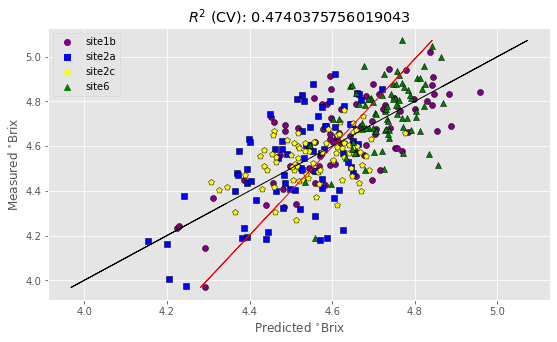

In [49]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(x, y_sla_max, 50)
x1_sla_max = opt_Xc_sla_max[0:80,:]
x2_sla_max = opt_Xc_sla_max[80:160,:]
x3_sla_max = opt_Xc_sla_max[160:240,:]
x4_sla_max = opt_Xc_sla_max[240:550,:]

y1_sla_max = y_sla_max[0:80,:]
y2_sla_max = y_sla_max[80:160,:]
y3_sla_max = y_sla_max[160:240,:]
y4_sla_max = y_sla_max[240:550,:]
file_name_sla_max = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/sla_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
                             y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
                             ncomp_sla_max, labels, file_name_sla_max)

In [83]:
optimal_pls_sla_max  = PLSRegression(n_components=9)
optimal_pls_sla_max.fit(opt_Xc_sla_max, y_sla_max[:, 0].astype(np.float64))

coefficients_sla_max = optimal_pls_sla_max.coef_[:,0]
bands_sla_max = band_name[sorted_ind_sla_max][wav_sla_max:]

print(coefficients_sla_max.shape, bands_sla_max.shape)

coefficients_sla_max

(73,) (73,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.14633608, -0.14862128, -0.1289962 ,  0.12246037,  0.11886835,
       -0.07202006,  0.1539384 ,  0.12135353, -0.11089187, -0.09621228,
       -0.08118949,  0.14260476, -0.1104341 ,  0.13130158, -0.05992151,
        0.08131174, -0.09763163,  0.08097044,  0.08722506, -0.13022064,
        0.10283093,  0.15868292, -0.07622063, -0.09378892, -0.10164   ,
       -0.05118272, -0.09488967,  0.09724682, -0.12654486,  0.07246409,
       -0.12911837, -0.11895469,  0.05433143, -0.12977534, -0.08272563,
        0.14798264,  0.10035839, -0.1156862 ,  0.15327519,  0.14394123,
       -0.12049815,  0.10044282, -0.11917773,  0.21273421, -0.1355295 ,
       -0.11804396, -0.13752044, -0.19406248,  0.19172458,  0.19337019,
       -0.12347611,  0.15447268, -0.17159124, -0.16838319,  0.17086108,
        0.20553657, -0.10672819, -0.09784968,  0.15180144, -0.17346833,
       -0.13328386,  0.16564618,  0.1919774 , -0.08064151,  0.24113173,
        0.2226379 , -0.1055997 , -0.25656731, -0.16723795, -0.24

In [84]:
optimal_pls_sla_max.intercept_

array([4.61070474])

In [85]:
bands_sla_max

array(['band_268', 'band_372', 'band_348', 'band_183', 'band_67',
       'band_72', 'band_272', 'band_180', 'band_79', 'band_171',
       'band_30', 'band_394', 'band_174', 'band_111', 'band_35',
       'band_328', 'band_177', 'band_102', 'band_101', 'band_373',
       'band_367', 'band_168', 'band_69', 'band_237', 'band_173',
       'band_153', 'band_233', 'band_98', 'band_333', 'band_104',
       'band_132', 'band_74', 'band_326', 'band_335', 'band_402',
       'band_42', 'band_99', 'band_389', 'band_395', 'band_19', 'band_31',
       'band_112', 'band_21', 'band_156', 'band_338', 'band_113',
       'band_119', 'band_85', 'band_37', 'band_68', 'band_283', 'band_27',
       'band_135', 'band_25', 'band_377', 'band_271', 'band_32',
       'band_154', 'band_403', 'band_225', 'band_247', 'band_45',
       'band_17', 'band_327', 'band_223', 'band_116', 'band_218',
       'band_62', 'band_144', 'band_384', 'band_26', 'band_216',
       'band_393'], dtype='<U8')

In [108]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_sla_max]

print(adjusted_bands)

[267, 371, 347, 182, 66, 71, 271, 179, 78, 170, 29, 393, 173, 110, 34, 327, 176, 101, 100, 372, 366, 167, 68, 236, 172, 152, 232, 97, 332, 103, 131, 73, 325, 334, 401, 41, 98, 388, 394, 18, 30, 111, 20, 155, 337, 112, 118, 84, 36, 67, 282, 26, 134, 24, 376, 270, 31, 153, 402, 224, 246, 44, 16, 326, 222, 115, 217, 61, 143, 383, 25, 215, 392]


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  223
Optimised MSEP  0.006840918558115317



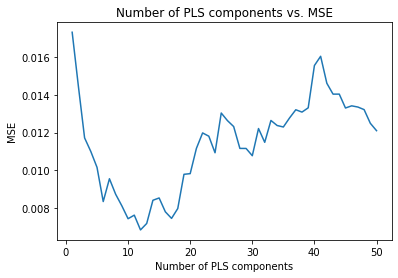

R2 calib: 0.814
R2 CV: 0.636
MSE calib: 0.003
MSE CV: 0.007
[0.12113144] [0.72785665]
None
0 site1b [0.36436743] [0.41228407439198145 'sla_site1b_07_025.tif']
1 site1b [0.33776061] [0.25595611105734717 'sla_site1b_09_028.tif']
2 site1b [0.43705412] [0.4296849261671993 'sla_site1b_14_053.tif']
3 site1b [0.32606805] [0.2570159080948238 'sla_site1b_17_025.tif']
4 site1b [0.37105311] [0.3090517915358693 'sla_site1b_18_046.tif']
5 site1b [0.37234813] [0.24223988646872022 'sla_site1b_18_048.tif']
6 site1b [0.2550115] [0.2621373612452732 'sla_site1b_18_051.tif']
7 site1b [0.399488] [0.35625330454680043 'sla_site1b_19_030.tif']
8 site1b [0.36931788] [0.3404843211143404 'sla_site1b_19_063.tif']
9 site1b [0.3844813] [0.2708352983215732 'sla_site1b_21_018.tif']
10 site1b [0.40144589] [0.4193883616570411 'sla_site1b_21_034.tif']
11 site1b [0.38251903] [0.3117878725859326 'sla_site1b_21_052.tif']
12 site1b [0.37355444] [0.32869842074110867 'sla_site1b_22_035.tif']
13 site1b [0.39525195] [0.47749403

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 [0.291457735335849 'sla_site1b_51_075.tif']
69 site1b [0.31581554] [0.3073188789133038 'sla_site1b_52_044.tif']
70 site1b [0.24850822] [0.20609420004621037 'sla_site1b_53_065.tif']
71 site1b [0.35830763] [0.46765834820072005 'sla_site1b_53_078.tif']
72 site1b [0.2984622] [0.311779655557537 'sla_site1b_54_048.tif']
73 site1b [0.17877846] [0.2114810662625624 'sla_site1b_54_065.tif']
74 site1b [0.17877846] [0.20949747457201912 'sla_site1b_54_066.tif']
75 site1b [0.36579797] [0.3437833765898785 'sla_site1b_54_089.tif']
76 site1b [0.24532558] [0.23808827347782185 'sla_site1b_55_066.tif']
77 site1b [0.23521117] [0.24923457531867066 'sla_site1b_56_067.tif']
78 site1b [0.37146867] [0.24444198958483004 'sla_site1b_57_070.tif']
79 site1b [0.25196164] [0.28866541208399443 'sla_site1b_57_083.tif']
80 site2a [0.47510376] [0.6260699452147949 'sla_site2a_10_015.tif']
81 site2a [0.43744379] [0.5220124998353781 'sla_site2a_10_018.tif']
82 site2a [0.51796451] [0.4125055851367197 'sla_site2a_10_021.tif'

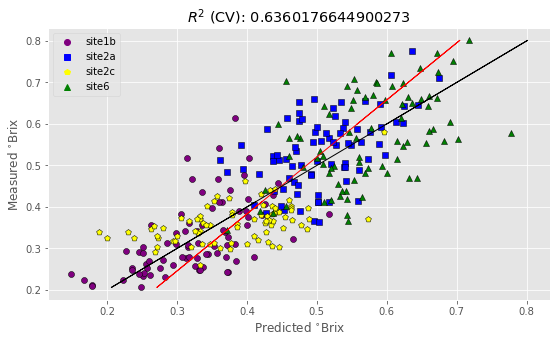

In [50]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(x, y_sla_std, 50)

x1_sla_std = opt_Xc_sla_std[0:80,:]
x2_sla_std = opt_Xc_sla_std[80:160,:]
x3_sla_std = opt_Xc_sla_std[160:240,:]
x4_sla_std = opt_Xc_sla_std[240:550,:]

y1_sla_std = y_sla_std[0:80,:]
y2_sla_std = y_sla_std[80:160,:]
y3_sla_std = y_sla_std[160:240,:]
y4_sla_std = y_sla_std[240:550,:]
file_name_sla_std = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/sla_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
                             y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
                             ncomp_sla_std, labels, file_name_sla_std)

In [86]:
optimal_pls_sla_std  = PLSRegression(n_components=12)
optimal_pls_sla_std.fit(opt_Xc_sla_std, y_sla_std[:, 0].astype(np.float64))

coefficients_sla_std = optimal_pls_sla_std.coef_[:,0]
bands_sla_std = band_name[sorted_ind_sla_std][wav_sla_std:]

print(coefficients_sla_std.shape, bands_sla_std.shape)

coefficients_sla_std

(96,) (96,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.26598398,  0.05298181,  0.10922591, -0.18204148,  0.2155368 ,
        0.01917437, -0.20558517, -0.08696982,  0.143607  ,  0.22515962,
        0.00353012,  0.03314988,  0.14752853,  0.00395838,  0.16849308,
       -0.03174011, -0.12433027,  0.07473829, -0.12959313,  0.04360719,
       -0.17691214, -0.14611251,  0.12790308, -0.08512245, -0.02899542,
       -0.19314281, -0.00293778, -0.16469086,  0.04424842, -0.08592587,
       -0.11756117, -0.12634972, -0.08384415, -0.12816715,  0.11811486,
        0.19172166,  0.15892534,  0.17231567,  0.05711586,  0.1364862 ,
       -0.23679033,  0.18861735,  0.15589618,  0.15512409,  0.17839385,
        0.08090211, -0.10176438,  0.08082613, -0.13402788, -0.11790636,
       -0.23169644, -0.0561608 , -0.00052114,  0.12246555, -0.12263384,
        0.23001703,  0.04867506, -0.09646868, -0.08281747, -0.19606492,
       -0.14194034,  0.12751464,  0.03252667,  0.19083809,  0.13809917,
       -0.27076086,  0.07333767, -0.20702108, -0.15369217, -0.10

In [87]:
optimal_pls_sla_std.intercept_

array([0.44662827])

In [88]:
bands_sla_std

array(['band_59', 'band_216', 'band_42', 'band_121', 'band_258',
       'band_277', 'band_37', 'band_265', 'band_103', 'band_102',
       'band_269', 'band_175', 'band_389', 'band_345', 'band_331',
       'band_270', 'band_101', 'band_16', 'band_90', 'band_45',
       'band_173', 'band_274', 'band_272', 'band_157', 'band_239',
       'band_183', 'band_104', 'band_349', 'band_71', 'band_109',
       'band_343', 'band_364', 'band_64', 'band_160', 'band_60',
       'band_27', 'band_148', 'band_166', 'band_111', 'band_381',
       'band_126', 'band_54', 'band_257', 'band_233', 'band_266',
       'band_226', 'band_151', 'band_385', 'band_185', 'band_247',
       'band_356', 'band_26', 'band_390', 'band_397', 'band_382',
       'band_125', 'band_180', 'band_221', 'band_114', 'band_365',
       'band_384', 'band_43', 'band_128', 'band_223', 'band_235',
       'band_362', 'band_260', 'band_36', 'band_66', 'band_178',
       'band_51', 'band_153', 'band_131', 'band_225', 'band_29',
       'band

In [109]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_sla_std]

print(adjusted_bands)

[58, 215, 41, 120, 257, 276, 36, 264, 102, 101, 268, 174, 388, 344, 330, 269, 100, 15, 89, 44, 172, 273, 271, 156, 238, 182, 103, 348, 70, 108, 342, 363, 63, 159, 59, 26, 147, 165, 110, 380, 125, 53, 256, 232, 265, 225, 150, 384, 184, 246, 355, 25, 389, 396, 381, 124, 179, 220, 113, 364, 383, 42, 127, 222, 234, 361, 259, 35, 65, 177, 50, 152, 130, 224, 28, 390, 30, 219, 255, 223, 399, 175, 359, 228, 52, 115, 362, 151, 37, 32, 137, 22, 55, 119, 168, 397]


# LDMC

In [51]:
ldmc_trait_pdf_ymax = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load('E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_ldmc.npy',  allow_pickle=True)

In [52]:

y_ldmc_max1 = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std1 = np.array(ldmc_trait_pdf_std)

In [53]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_max1 = y_ldmc_max1[0:80, :]
site2a_y_ldmc_max1 = y_ldmc_max1[80:160, :]
site2c_y_ldmc_max1 = y_ldmc_max1[160:240,:]
site6_y_ldmc_max1_1 = y_ldmc_max1[240:550,:]
# site6_y_ldmc_max1_2 = y_ldmc_max1[3394:3574,:]
y_ldmc_max = np.vstack((site1b_y_ldmc_max1, site2a_y_ldmc_max1,site2c_y_ldmc_max1,site6_y_ldmc_max1_1))
# site2c_x = x[]
y_ldmc_max.shape

(320, 2)

In [54]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_std1 = y_ldmc_std1[0:80, :]
site2a_y_ldmc_std1 = y_ldmc_std1[80:160, :]
site2c_y_ldmc_std1 = y_ldmc_std1[160:240,:]
site6_y_ldmc_std1_1 = y_ldmc_std1[240:550,:]
# site6_y_ldmc_std1_2 = y_ldmc_std1[3394:3574,:]
y_ldmc_std = np.vstack((site1b_y_ldmc_std1, site2a_y_ldmc_std1,site2c_y_ldmc_std1,site6_y_ldmc_std1_1))
# site2c_x = x[]
y_ldmc_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  197
Optimised MSEP  0.1455137528986245



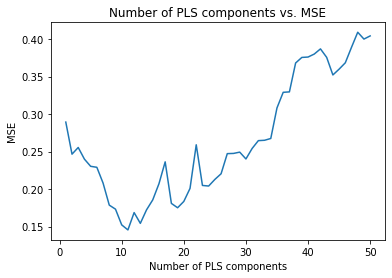

R2 calib: 0.733
R2 CV: 0.500
MSE calib: 0.076
MSE CV: 0.142
[-0.18574294] [0.6200134]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [-0.92123592] [-1.9657196409244553 'ldmc_site1b_07_025.tif']
1 site1b [-0.88472069] [-1.0293677346914096 'ldmc_site1b_09_028.tif']
2 site1b [0.12867614] [0.9489480034308997 'ldmc_site1b_14_053.tif']
3 site1b [-0.39535849] [0.12919500183570687 'ldmc_site1b_17_025.tif']
4 site1b [0.18362465] [0.2577671949850706 'ldmc_site1b_18_046.tif']
5 site1b [0.15351532] [-0.13945925511769897 'ldmc_site1b_18_048.tif']
6 site1b [0.2398228] [0.42860722649811267 'ldmc_site1b_18_051.tif']
7 site1b [-1.4572875] [-2.3648349055170566 'ldmc_site1b_19_030.tif']
8 site1b [-0.18285155] [-0.012460893626248915 'ldmc_site1b_19_063.tif']
9 site1b [-0.34349661] [-0.9653835435304172 'ldmc_site1b_21_018.tif']
10 site1b [-0.64336866] [-0.2706981797329058 'ldmc_site1b_21_034.tif']
11 site1b [-0.02809575] [0.18724456524374222 'ldmc_site1b_21_052.tif']
12 site1b [-0.29535647] [-0.4612802242955629 'ldmc_site1b_22_035.tif']
13 site1b [-0.06665524] [0.0934183423490178 'ldmc_site1b_22_037.tif']
14 site1b [-0.3155779]

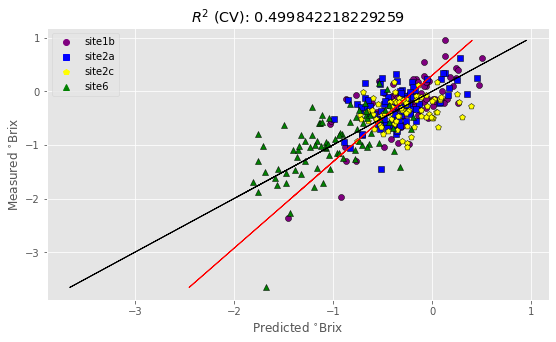

In [55]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 50)
x1_ldmc_max = opt_Xc_ldmc_max[0:80,:]
x2_ldmc_max = opt_Xc_ldmc_max[80:160,:]
x3_ldmc_max = opt_Xc_ldmc_max[160:240,:]
x4_ldmc_max = opt_Xc_ldmc_max[240:550,:]

y1_ldmc_max = y_ldmc_max[0:80,:]
y2_ldmc_max = y_ldmc_max[80:160,:]
y3_ldmc_max = y_ldmc_max[160:240,:]
y4_ldmc_max = y_ldmc_max[240:550,:]
file_name_ldmc_max = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/ldmc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
                             y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [89]:
optimal_pls_ldmc_max  = PLSRegression(n_components=11)
optimal_pls_ldmc_max.fit(opt_Xc_ldmc_max, y_ldmc_max[:, 0].astype(np.float64))

coefficients_ldmc_max = optimal_pls_ldmc_max.coef_[:,0]
bands_ldmc_max = band_name[sorted_ind_ldmc_max][wav_ldmc_max:]

print(coefficients_ldmc_max.shape, bands_ldmc_max.shape)

coefficients_ldmc_max

(122,) (122,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.49513643,  0.14755128, -0.46422265,  0.36161023, -0.26378836,
        0.40015302,  0.34735052,  0.17331566, -0.45293564, -0.04673338,
        0.42768256, -0.32959581,  0.29886839,  0.51765395, -0.34129859,
        0.49597419,  0.34147489, -0.50152285, -0.30867992,  0.34720243,
       -0.36663253,  0.53274651,  0.27183793, -0.43884717,  0.26949439,
       -0.35720592,  0.46651051,  0.28718547,  0.29523649, -0.25926189,
        0.30080742,  0.35142438,  0.53138645, -0.32632393,  0.19247297,
        0.28920762,  0.55231257,  0.30178757,  0.30818645, -0.44521112,
        0.45746234,  0.55710559,  0.42470387,  0.29607054, -0.44561048,
       -0.41723506, -0.20427427, -0.58344866, -0.4191436 , -0.35838512,
        0.30329718,  0.30065761, -0.5674075 ,  0.20126653, -0.51008633,
       -0.46616016,  0.4297954 , -0.50339056, -0.4394685 ,  0.49738789,
       -0.44285783,  0.46260754,  0.40220772,  0.41549119, -0.46608684,
       -0.45803247, -0.26321457,  0.38349097,  0.39226647, -0.57

In [90]:
optimal_pls_ldmc_max.intercept_

array([-0.46505916])

In [91]:
bands_ldmc_max

array(['band_94', 'band_280', 'band_59', 'band_345', 'band_245',
       'band_144', 'band_169', 'band_274', 'band_182', 'band_24',
       'band_137', 'band_348', 'band_371', 'band_126', 'band_88',
       'band_335', 'band_75', 'band_340', 'band_30', 'band_342',
       'band_58', 'band_285', 'band_45', 'band_376', 'band_387',
       'band_382', 'band_18', 'band_139', 'band_180', 'band_29',
       'band_70', 'band_268', 'band_176', 'band_43', 'band_130',
       'band_367', 'band_267', 'band_330', 'band_356', 'band_166',
       'band_255', 'band_78', 'band_332', 'band_114', 'band_374',
       'band_91', 'band_157', 'band_36', 'band_116', 'band_282',
       'band_326', 'band_404', 'band_365', 'band_390', 'band_86',
       'band_251', 'band_354', 'band_111', 'band_244', 'band_64',
       'band_172', 'band_277', 'band_90', 'band_156', 'band_161',
       'band_119', 'band_149', 'band_151', 'band_281', 'band_153',
       'band_181', 'band_49', 'band_355', 'band_122', 'band_389',
       'band_1

In [110]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_ldmc_max]

print(adjusted_bands)

[93, 279, 58, 344, 244, 143, 168, 273, 181, 23, 136, 347, 370, 125, 87, 334, 74, 339, 29, 341, 57, 284, 44, 375, 386, 381, 17, 138, 179, 28, 69, 267, 175, 42, 129, 366, 266, 329, 355, 165, 254, 77, 331, 113, 373, 90, 156, 35, 115, 281, 325, 403, 364, 389, 85, 250, 353, 110, 243, 63, 171, 276, 89, 155, 160, 118, 148, 150, 280, 152, 180, 48, 354, 121, 388, 131, 245, 145, 178, 400, 67, 50, 393, 176, 283, 56, 369, 141, 96, 37, 177, 361, 18, 31, 380, 62, 112, 157, 270, 396, 367, 73, 232, 71, 217, 222, 65, 119, 41, 78, 377, 326, 25, 30, 97, 66, 394, 32, 49, 36, 215, 26]


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  218
Optimised MSEP  0.026378745039466654



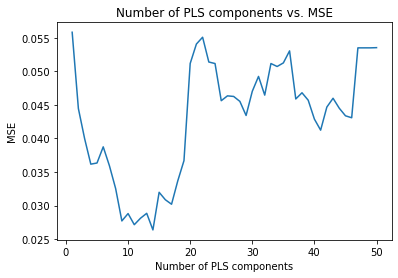

R2 calib: 0.857

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(



R2 CV: 0.608
MSE calib: 0.010
MSE CV: 0.027
[0.26203649] [0.7064851]
None
0 site1b [1.01008541] [0.757561962158938 'ldmc_site1b_07_025.tif']
1 site1b [0.68535803] [0.6374900317427783 'ldmc_site1b_09_028.tif']
2 site1b [1.42290617] [1.0852535501876286 'ldmc_site1b_14_053.tif']
3 site1b [0.68344085] [0.5299323443274216 'ldmc_site1b_17_025.tif']
4 site1b [0.63706558] [0.5758498958460894 'ldmc_site1b_18_046.tif']
5 site1b [0.73673733] [0.6241558222147378 'ldmc_site1b_18_048.tif']
6 site1b [0.37574453] [0.486180448562983 'ldmc_site1b_18_051.tif']
7 site1b [0.82711063] [0.979766477757077 'ldmc_site1b_19_030.tif']
8 site1b [0.95849482] [0.7581495603944975 'ldmc_site1b_19_063.tif']
9 site1b [0.85480644] [1.10182124148114 'ldmc_site1b_21_018.tif']
10 site1b [0.9793753] [1.0671545793682422 'ldmc_site1b_21_034.tif']
11 site1b [0.79719461] [0.7539355877935562 'ldmc_site1b_21_052.tif']
12 site1b [0.80034076] [0.8306438705741611 'ldmc_site1b_22_035.tif']
13 site1b [0.75984702] [0.9042368178131175 '

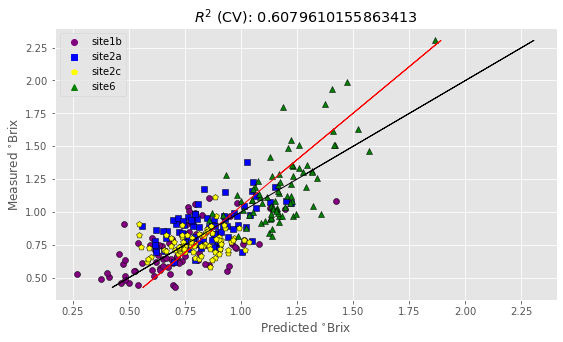

In [56]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 50)

x1_ldmc_std = opt_Xc_ldmc_std[0:80,:]
x2_ldmc_std = opt_Xc_ldmc_std[80:160,:]
x3_ldmc_std = opt_Xc_ldmc_std[160:240,:]
x4_ldmc_std = opt_Xc_ldmc_std[240:550,:]

y1_ldmc_std = y_ldmc_std[0:80,:]
y2_ldmc_std = y_ldmc_std[80:160,:]
y3_ldmc_std = y_ldmc_std[160:240,:]
y4_ldmc_std = y_ldmc_std[240:550,:]
file_name_ldmc_max = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/ldmc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
                             y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)

In [92]:
optimal_pls_ldmc_std  = PLSRegression(n_components=14)
optimal_pls_ldmc_std.fit(opt_Xc_ldmc_std, y_ldmc_std[:, 0].astype(np.float64))

coefficients_ldmc_std = optimal_pls_ldmc_std.coef_[:,0]
bands_ldmc_std = band_name[sorted_ind_ldmc_std][wav_ldmc_std:]

print(coefficients_ldmc_std.shape, bands_ldmc_std.shape)

coefficients_ldmc_std

(101,) (101,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.26073649, -0.22144117, -0.33738899,  0.49648885, -0.27709578,
        0.19528744, -0.10910189,  0.16521097,  0.13379658, -0.24721699,
        0.13590218,  0.56938753,  0.11255941,  0.05803997,  0.12851756,
       -0.10852287,  0.57136338,  0.4000207 ,  0.55908841,  0.22747214,
        0.42480867,  0.24801649,  0.11291082,  0.31331155,  0.27709177,
       -0.270495  , -0.17705805,  0.16228751, -0.26257439,  0.26849303,
        0.18930396,  0.18028527, -0.58503341, -0.09114078, -0.24086593,
       -0.24765451,  0.41449521,  0.58678564,  0.37049192,  0.17259208,
        0.18117601, -0.06104753,  0.19013893, -0.35858763, -0.01896705,
        0.47931297,  0.25589531, -0.04192447, -0.21301523,  0.38614144,
        0.36686081,  0.28531084, -0.00841502, -0.18407385, -0.34547706,
       -0.31988407, -0.64027819,  0.33386995,  0.32906418, -0.41349508,
        0.33828575, -0.05598199, -0.43831799, -0.6290238 ,  0.59690281,
       -0.30620378, -0.29482932, -0.92353803, -0.24206422, -0.21

In [93]:
optimal_pls_ldmc_std.intercept_

array([0.88788823])

In [94]:
bands_ldmc_std

array(['band_72', 'band_66', 'band_121', 'band_181', 'band_106',
       'band_327', 'band_239', 'band_148', 'band_16', 'band_345',
       'band_100', 'band_120', 'band_338', 'band_182', 'band_43',
       'band_382', 'band_124', 'band_97', 'band_376', 'band_55',
       'band_386', 'band_44', 'band_39', 'band_54', 'band_138',
       'band_240', 'band_47', 'band_233', 'band_220', 'band_140',
       'band_77', 'band_38', 'band_178', 'band_387', 'band_160',
       'band_145', 'band_61', 'band_245', 'band_125', 'band_105',
       'band_18', 'band_222', 'band_373', 'band_89', 'band_53',
       'band_104', 'band_256', 'band_83', 'band_40', 'band_354',
       'band_165', 'band_115', 'band_254', 'band_136', 'band_154',
       'band_356', 'band_232', 'band_31', 'band_244', 'band_265',
       'band_108', 'band_344', 'band_99', 'band_252', 'band_258',
       'band_62', 'band_149', 'band_78', 'band_29', 'band_70', 'band_79',
       'band_281', 'band_139', 'band_173', 'band_117', 'band_169',
       '

In [111]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_ldmc_std]

print(adjusted_bands)

[71, 65, 120, 180, 105, 326, 238, 147, 15, 344, 99, 119, 337, 181, 42, 381, 123, 96, 375, 54, 385, 43, 38, 53, 137, 239, 46, 232, 219, 139, 76, 37, 177, 386, 159, 144, 60, 244, 124, 104, 17, 221, 372, 88, 52, 103, 255, 82, 39, 353, 164, 114, 253, 135, 153, 355, 231, 30, 243, 264, 107, 343, 98, 251, 257, 61, 148, 77, 28, 69, 78, 280, 138, 172, 116, 168, 233, 92, 363, 277, 109, 32, 100, 398, 62, 175, 59, 369, 349, 22, 352, 358, 125, 50, 224, 222, 223, 380, 348, 354, 55]


# PN

In [ ]:
# pn_trait_pdf_ymax = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_ymax_pn.npy',  allow_pickle=True)
# pn_trait_pdf_std = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_std_pn.npy',  allow_pickle=True)

In [ ]:
# y_pn_max1 = np.array(pn_trait_pdf_ymax)

# y_pn_std1 = np.array(pn_trait_pdf_std)

In [ ]:
# site1b_y_pn_max1 = y_pn_max1[0:300, :]
# site2a_y_pn_max1 = y_pn_max1[300:600, :]
# site2c_y_pn_max1 = y_pn_max1[600:900,:]
# site6_y_pn_max1_1 = y_pn_max1[900:1193,:]
# # site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
# y_pn_max = np.vstack((site1b_y_pn_max1, site2a_y_pn_max1,site2c_y_pn_max1,site6_y_pn_max1_1))
# # site2c_x = x[]
# y_pn_max.shape

In [ ]:
# site1b_y_pn_std1 = y_pn_std1[0:300, :]
# site2a_y_pn_std1 = y_pn_std1[300:600, :]
# site2c_y_pn_std1 = y_pn_std1[600:900,:]
# site6_y_pn_std1_1 = y_pn_std1[900:1193,:]
# # site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
# y_pn_std = np.vstack((site1b_y_pn_std1, site2a_y_pn_std1,site2c_y_pn_std1,site6_y_pn_std1_1))
# # site2c_x = x[]
# y_pn_std.shape

In [ ]:
# opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(x, y_pn_max, 50)
# x1_pn_max = opt_Xc_pn_max[0:300,:]
# x2_pn_max = opt_Xc_pn_max[300:600,:]
# x3_pn_max = opt_Xc_pn_max[600:900,:]
# x4_pn_max = opt_Xc_pn_max[900:1193,:]

# y1_pn_max = y_pn_max[0:300,:]
# y2_pn_max = y_pn_max[300:600,:]
# y3_pn_max = y_pn_max[600:900,:]
# y4_pn_max = y_pn_max[900:1193,:]
# file_name_pn_max = 'E:/wenqu/model_csv_point/pn_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_max,x1_pn_max,x2_pn_max,x3_pn_max,x4_pn_max,
#                              y_pn_max,y1_pn_max,y2_pn_max,y3_pn_max,y4_pn_max,
#                              ncomp_pn_max, labels, file_name_pn_max)

In [ ]:
# opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(x, y_pn_std, 50)

# x1_pn_std = opt_Xc_pn_std[0:300,:]
# x2_pn_std = opt_Xc_pn_std[300:600,:]
# x3_pn_std = opt_Xc_pn_std[600:900,:]
# x4_pn_std = opt_Xc_pn_std[900:1193,:]

# y1_pn_std = y_pn_std[0:300,:]
# y2_pn_std = y_pn_std[300:600,:]
# y3_pn_std = y_pn_std[600:900,:]
# y4_pn_std = y_pn_std[900:1193,:]
# file_name_pn_std = 'E:/wenqu/model_csv_point/pn_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_std,x1_pn_std,x2_pn_std,x3_pn_std,x4_pn_std,
#                              y_pn_std,y1_pn_std,y2_pn_std,y3_pn_std,y4_pn_std,
#                              ncomp_pn_std, labels, file_name_pn_std)

# PC

In [57]:
pc_trait_pdf_ymax = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/numpy/resampled_std_pc.npy',  allow_pickle=True)

In [58]:
y_pc_max1 = np.array(pc_trait_pdf_ymax)

y_pc_std1 = np.array(pc_trait_pdf_std)

In [59]:
site1b_y_pc_max1 = y_pc_max1[0:80, :]
site2a_y_pc_max1 = y_pc_max1[80:160, :]
site2c_y_pc_max1 = y_pc_max1[160:240,:]
site6_y_pc_max1_1 = y_pc_max1[240:550,:]
# site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
y_pc_max = np.vstack((site1b_y_pc_max1, site2a_y_pc_max1,site2c_y_pc_max1,site6_y_pc_max1_1))
# site2c_x = x[]
y_pc_max.shape

(320, 2)

In [60]:
site1b_y_pc_std1 = y_pc_std1[0:80, :]
site2a_y_pc_std1 = y_pc_std1[80:160, :]
site2c_y_pc_std1 = y_pc_std1[160:240,:]
site6_y_pc_std1_1 = y_pc_std1[240:550,:]
# site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
y_pc_std = np.vstack((site1b_y_pc_std1, site2a_y_pc_std1,site2c_y_pc_std1,site6_y_pc_std1_1))
# site2c_x = x[]
y_pc_std.shape

(320, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  290
Optimised MSEP  0.003492030739634818



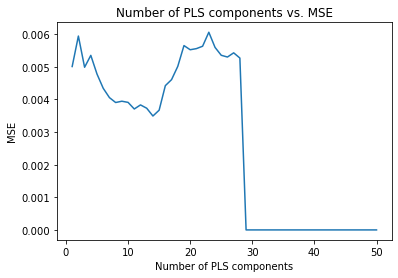

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [61]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(x, y_pc_max, 50)
x1_pc_max = opt_Xc_pc_max[0:80,:]
x2_pc_max = opt_Xc_pc_max[80:160,:]
x3_pc_max = opt_Xc_pc_max[160:240,:]
x4_pc_max = opt_Xc_pc_max[240:550,:]

y1_pc_max = y_pc_max[0:80,:]
y2_pc_max = y_pc_max[80:160,:]
y3_pc_max = y_pc_max[160:240,:]
y4_pc_max = y_pc_max[240:550,:]


In [95]:
optimal_pls_pc_max  = PLSRegression(n_components=14)
optimal_pls_pc_max.fit(opt_Xc_pc_max, y_pc_max[:, 0].astype(np.float64))

coefficients_pc_max = optimal_pls_pc_max.coef_[:,0]
bands_pc_max = band_name[sorted_ind_pc_max][wav_pc_max:]

print(coefficients_pc_max.shape, bands_pc_max.shape)

coefficients_pc_max

(29,) (29,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.14357966,  0.11575942, -0.20818208,  0.17854535,  0.23612259,
        0.11049685, -0.14376716, -0.13783047,  0.11912747,  0.02505293,
       -0.15631147, -0.16885769, -0.19448193,  0.12538612,  0.15069642,
       -0.191155  ,  0.05093048,  0.09872894, -0.26663821,  0.18100358,
       -0.05755996,  0.08957334, -0.2657886 , -0.09453278,  0.35265457,
        0.18275844,  0.22863688, -0.32424894, -0.16919217])

In [96]:
optimal_pls_pc_max.intercept_

array([3.83058324])

In [97]:
bands_pc_max

array(['band_142', 'band_226', 'band_167', 'band_404', 'band_82',
       'band_85', 'band_20', 'band_65', 'band_401', 'band_217',
       'band_348', 'band_105', 'band_35', 'band_395', 'band_37',
       'band_32', 'band_361', 'band_223', 'band_88', 'band_45',
       'band_108', 'band_116', 'band_338', 'band_62', 'band_271',
       'band_27', 'band_42', 'band_373', 'band_372'], dtype='<U8')

In [112]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_pc_max]

print(adjusted_bands)

[141, 225, 166, 403, 81, 84, 19, 64, 400, 216, 347, 104, 34, 394, 36, 31, 360, 222, 87, 44, 107, 115, 337, 61, 270, 26, 41, 372, 371]


R2 calib: 0.533
R2 CV: 0.393
MSE calib: 0.003
MSE CV: 0.003
[2.11605988] [0.44812057]
None
0 site1b [3.72981971] [3.6073306941347614 'pc_site1b_07_025.tif']
1 site1b [3.7655776] [3.665755258208018 'pc_site1b_09_028.tif']
2 site1b [3.85298056] [3.8345531829517334 'pc_site1b_14_053.tif']
3 site1b [3.77125322] [3.7852957849496063 'pc_site1b_17_025.tif']
4 site1b [3.90770469] [3.9793582826712117 'pc_site1b_18_046.tif']
5 site1b [3.94999698] [3.9268044440748016 'pc_site1b_18_048.tif']
6 site1b [3.89119262] [3.9227874838679453 'pc_site1b_18_051.tif']
7 site1b [3.7141958] [3.6289114672490816 'pc_site1b_19_030.tif']
8 site1b [3.76419134] [3.8393757591855064 'pc_site1b_19_063.tif']
9 site1b [3.73291253] [3.630586784352682 'pc_site1b_21_018.tif']
10 site1b [3.7529655] [3.651680297425757 'pc_site1b_21_034.tif']
11 site1b [3.87912087] [3.897181498151596 'pc_site1b_21_052.tif']
12 site1b [3.78054351] [3.810359161526362 'pc_site1b_22_035.tif']
13 site1b [3.87445273] [3.862596017990666 'pc_site1b_22_

203 site2c [3.76875834] [3.8162654097102275 'pc_site2c_20_022.tif']
204 site2c [3.84291256] [3.8125235715950376 'pc_site2c_20_024.tif']
205 site2c [3.80955779] [3.729603484199189 'pc_site2c_21_015.tif']
206 site2c [3.7763702] [3.836891293128771 'pc_site2c_21_017.tif']
207 site2c [3.80714546] [3.802118421554243 'pc_site2c_21_019.tif']
208 site2c [3.76546286] [3.7607573328012394 'pc_site2c_21_024.tif']
209 site2c [3.89343445] [3.8053124926119946 'pc_site2c_22_020.tif']
210 site2c [3.81510674] [3.866698997068603 'pc_site2c_22_025.tif']
211 site2c [3.8217705] [3.8105146941971224 'pc_site2c_22_026.tif']
212 site2c [3.81385261] [3.805909613696238 'pc_site2c_23_016.tif']
213 site2c [3.79977759] [3.7765019600240537 'pc_site2c_23_020.tif']
214 site2c [3.81366525] [3.7933801114291694 'pc_site2c_23_021.tif']
215 site2c [3.82002049] [3.8936964952426885 'pc_site2c_23_025.tif']
216 site2c [3.82241479] [3.80481870545174 'pc_site2c_24_016.tif']
217 site2c [3.78086908] [3.760598484307515 'pc_site2c_24_

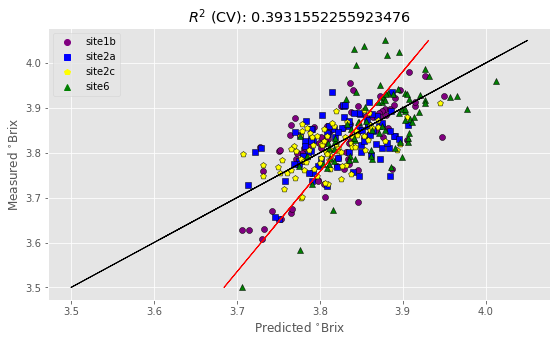

In [62]:
file_name_pc_max = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/pc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_max,x1_pc_max, x2_pc_max,x3_pc_max,x4_pc_max,
                             y_pc_max,y1_pc_max,y2_pc_max,y3_pc_max,y4_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(320, 319)
2% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(320, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  277
Optimised MSEP  0.0009177591724728407



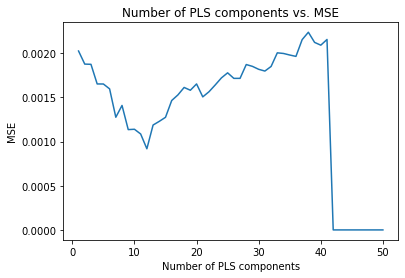

R2 calib: 0.686
R2 CV: 0.571
MSE calib: 0.001
MSE CV: 0.001
[0.05682845] [0.62751007]
None
0 site1b [0.15705865] [0.11191844035071528 'pc_site1b_07_025.tif']
1 site1b [0.09659264] [0.09160240964636868 'pc_site1b_09_028.tif']
2 site1b [0.15116982] [0.14904799751218942 'pc_site1b_14_053.tif']
3 site1b [0.12668564] [0.09938796612543306 'pc_site1b_17_025.tif']
4 site1b [0.128996] [0.12363322134449017 'pc_site1b_18_046.tif']
5 site1b [0.1360338] [0.0930786888192487 'pc_site1b_18_048.tif']
6 site1b [0.12675253] [0.1006988243372703 'pc_site1b_18_051.tif']
7 site1b [0.13480556] [0.11891052996397876 'pc_site1b_19_030.tif']
8 site1b [0.14735822] [0.11327948513187704 'pc_site1b_19_063.tif']
9 site1b [0.11453673] [0.09863239916102047 'pc_site1b_21_018.tif']
10 site1b [0.14245416] [0.16479168591801086 'pc_site1b_21_034.tif']
11 site1b [0.15911536] [0.13663581506597441 'pc_site1b_21_052.tif']
12 site1b [0.10710888] [0.11024794558049027 'pc_site1b_22_035.tif']
13 site1b [0.14987382] [0.15912876481645

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 [0.13880920668452884 'pc_site2a_26_015.tif']
132 site2a [0.14607285] [0.1548551171699666 'pc_site2a_26_017.tif']
133 site2a [0.14831207] [0.19471561401905343 'pc_site2a_26_024.tif']
134 site2a [0.16441358] [0.11885505131745717 'pc_site2a_27_012.tif']
135 site2a [0.15581349] [0.1456359692827145 'pc_site2a_27_019.tif']
136 site2a [0.16780883] [0.1781071429605202 'pc_site2a_27_020.tif']
137 site2a [0.1850506] [0.22959833420701545 'pc_site2a_27_022.tif']
138 site2a [0.15952161] [0.16458494473448915 'pc_site2a_28_030.tif']
139 site2a [0.12422437] [0.13832751414826014 'pc_site2a_29_015.tif']
140 site2a [0.15321277] [0.1088751419562963 'pc_site2a_29_021.tif']
141 site2a [0.15551095] [0.16271204345227527 'pc_site2a_29_022.tif']
142 site2a [0.15762143] [0.18164972419956002 'pc_site2a_29_024.tif']
143 site2a [0.15087298] [0.1770516822082292 'pc_site2a_30_027.tif']
144 site2a [0.15596552] [0.1105627792817875 'pc_site2a_30_028.tif']
145 site2a [0.1281999] [0.1678792111009704 'pc_site2a_30_031.tif

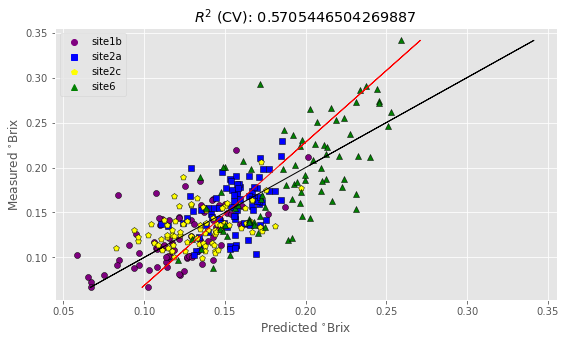

In [63]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(x, y_pc_std, 50)

x1_pc_std = opt_Xc_pc_std[0:80,:]
x2_pc_std = opt_Xc_pc_std[80:160,:]
x3_pc_std = opt_Xc_pc_std[160:240,:]
x4_pc_std = opt_Xc_pc_std[240:550,:]

y1_pc_std = y_pc_std[0:80,:]
y2_pc_std = y_pc_std[80:160,:]
y3_pc_std = y_pc_std[160:240,:]
y4_pc_std = y_pc_std[240:550,:]
file_name_pc_std = 'E:/wenqu/trait_map/update1/trait_map_with_scale/training/training1/csv/pc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_std,x1_pc_std,x2_pc_std,x3_pc_std,x4_pc_std,
                             y_pc_std,y1_pc_std,y2_pc_std,y3_pc_std,y4_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)

In [98]:
optimal_pls_pc_std  = PLSRegression(n_components=12)
optimal_pls_pc_std.fit(opt_Xc_pc_std, y_pc_std[:, 0].astype(np.float64))

coefficients_pc_std = optimal_pls_pc_std.coef_[:,0]
bands_pc_std = band_name[sorted_ind_pc_std][wav_pc_std:]

print(coefficients_pc_std.shape, bands_pc_std.shape)

coefficients_pc_std

(42,) (42,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.07189727, -0.00470446, -0.07662388, -0.06440754, -0.17102242,
       -0.06465241,  0.07034947,  0.0378384 ,  0.04613792,  0.0711059 ,
        0.00357814, -0.07792298,  0.03316936, -0.03292281,  0.03731021,
        0.14137996,  0.0217497 , -0.05136269,  0.05536994,  0.1083446 ,
        0.12302897, -0.12670473,  0.13610097, -0.04083614, -0.08888642,
        0.09951822,  0.09246046,  0.09149172, -0.04742584,  0.0669646 ,
       -0.12103685,  0.03783182, -0.03972055,  0.0402526 , -0.1470102 ,
        0.03633342, -0.09697314, -0.13073439,  0.03665951,  0.11357365,
       -0.13633804, -0.04509925])

In [99]:
optimal_pls_pc_std.intercept_

array([0.15061169])

In [100]:
bands_pc_std

array(['band_180', 'band_29', 'band_384', 'band_283', 'band_51',
       'band_365', 'band_379', 'band_152', 'band_223', 'band_54',
       'band_133', 'band_121', 'band_219', 'band_47', 'band_56',
       'band_244', 'band_118', 'band_360', 'band_149', 'band_43',
       'band_140', 'band_349', 'band_225', 'band_157', 'band_66',
       'band_52', 'band_256', 'band_277', 'band_64', 'band_381',
       'band_178', 'band_391', 'band_36', 'band_116', 'band_356',
       'band_45', 'band_169', 'band_224', 'band_216', 'band_50',
       'band_176', 'band_23'], dtype='<U8')

In [113]:
adjusted_bands = [int(band.replace("band_", "")) - 1 for band in bands_pc_std]

print(adjusted_bands)

[179, 28, 383, 282, 50, 364, 378, 151, 222, 53, 132, 120, 218, 46, 55, 243, 117, 359, 148, 42, 139, 348, 224, 156, 65, 51, 255, 276, 63, 380, 177, 390, 35, 115, 355, 44, 168, 223, 215, 49, 175, 22]
